In [1]:
import sys
import itertools

import matplotlib.pyplot as plt

sys.path.append('..')
from antlia.record import load_records

%load_ext autoreload
%autoreload 2

In [2]:
def set_title(ax, title):
    try:
        mpld3
    except NameError:
        ax.figure.suptitle(title)
    else:
        ax.set_title(title)
        
DEFAULT_FIGSIZE = (14, 7)

In [3]:
records = load_records(sync=False)

Unable to determine range 2
Unable to determine range 1


/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/Users/oliver/miniconda3/envs/dev/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


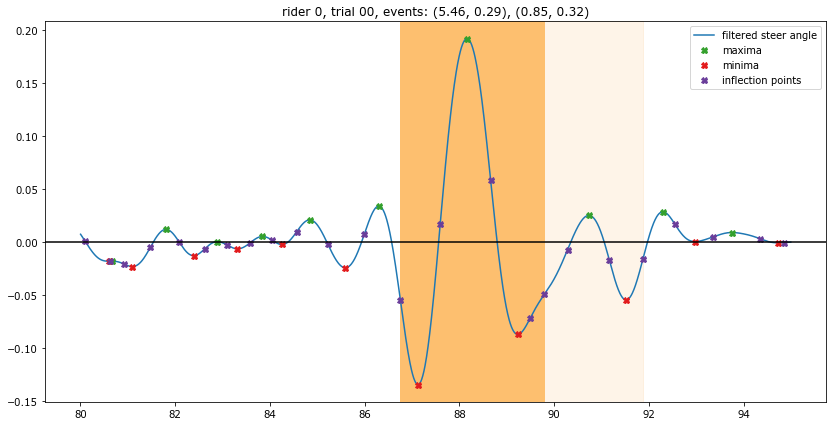

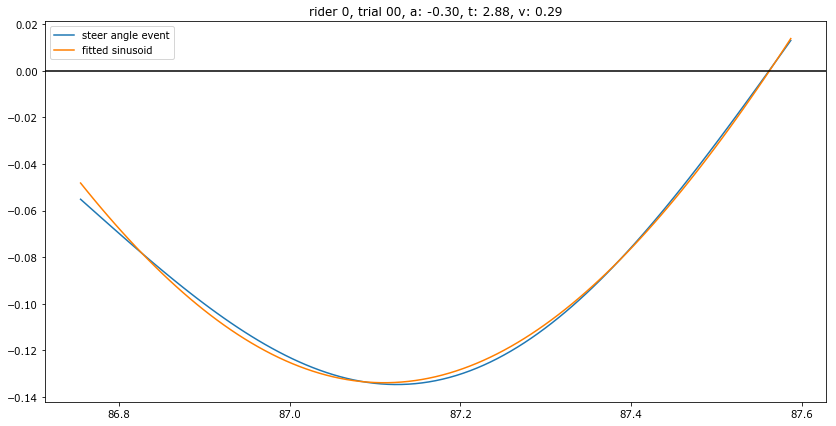

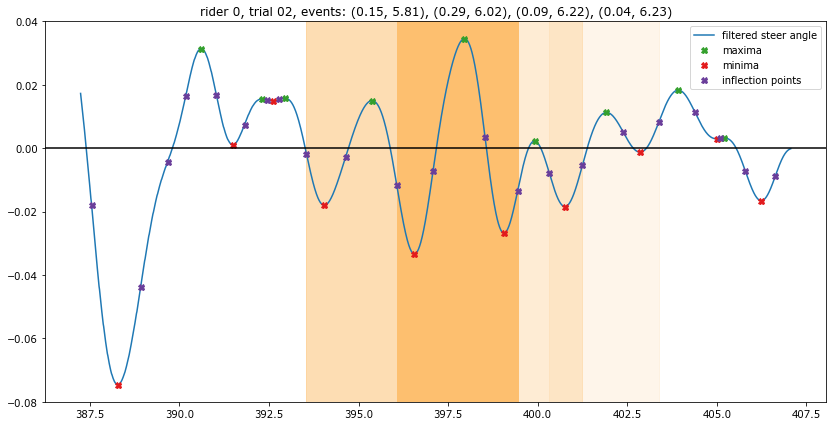

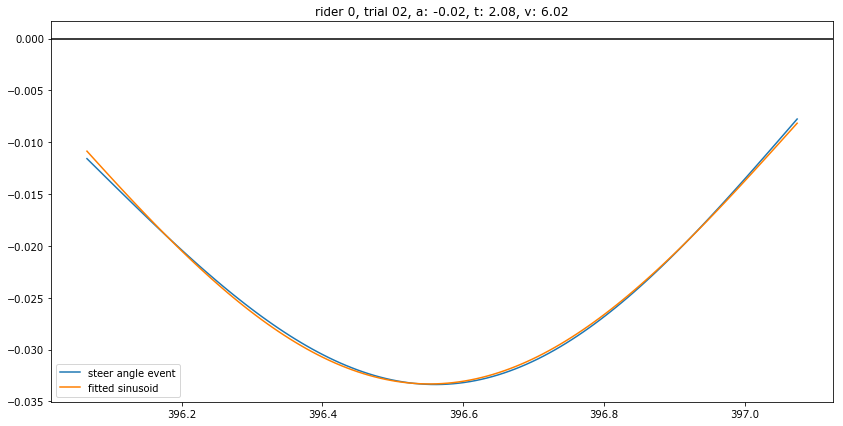

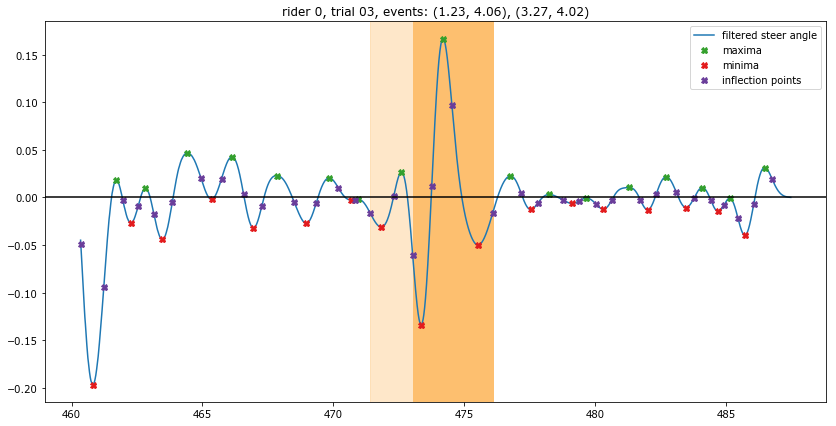

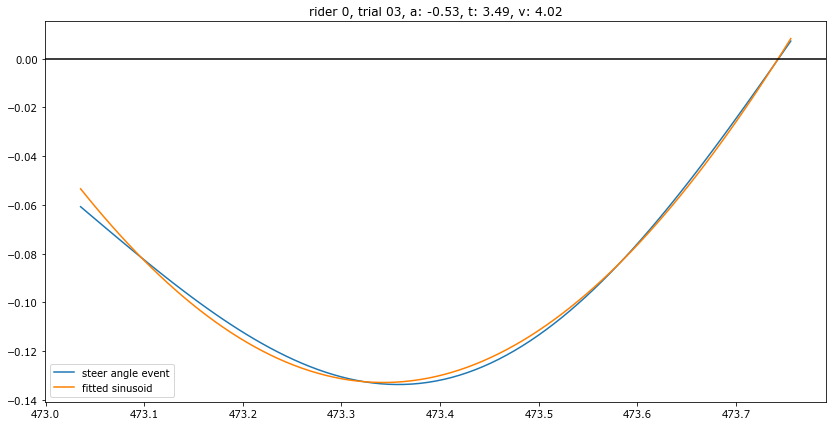

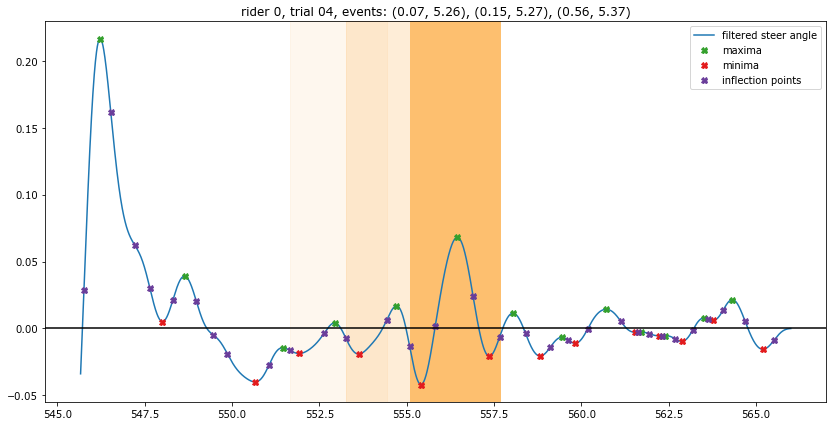

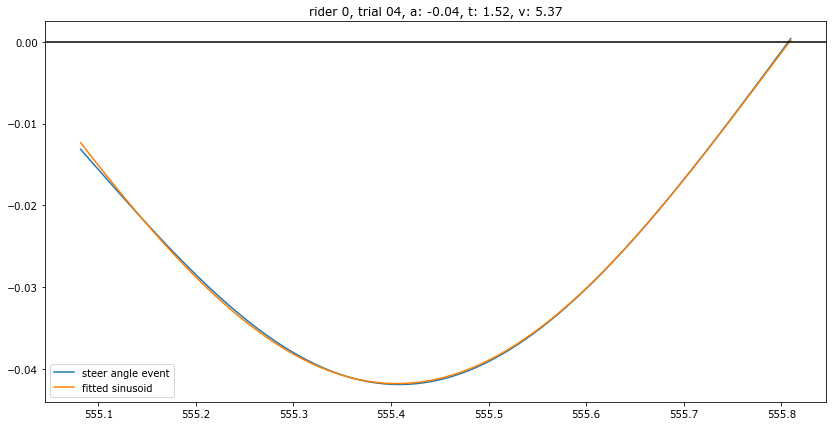

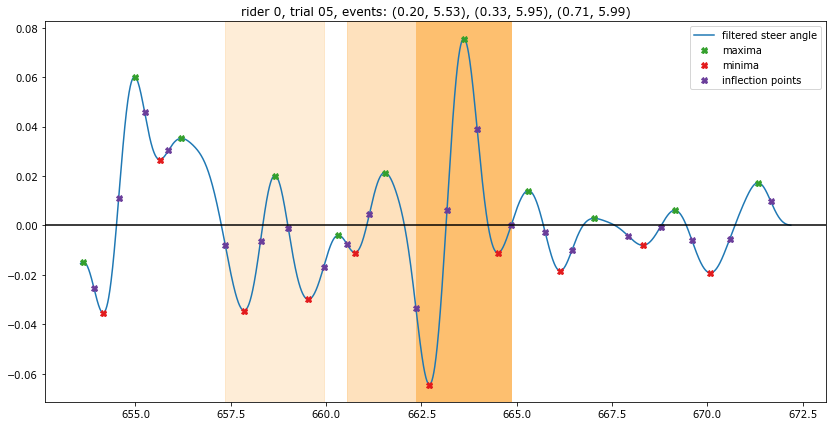

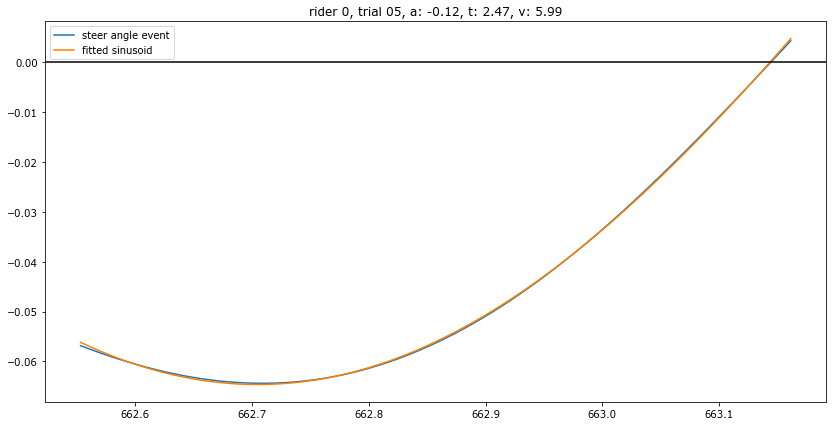

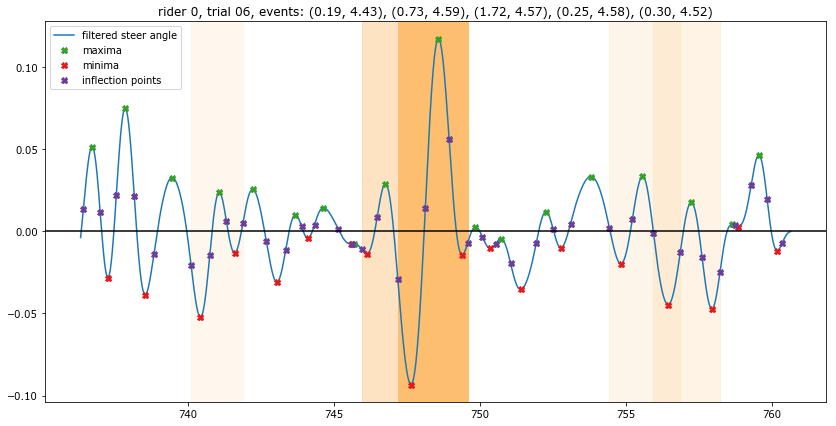

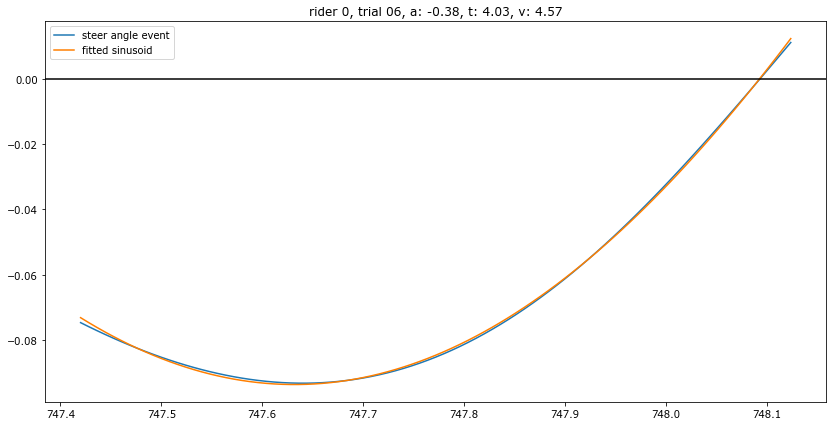

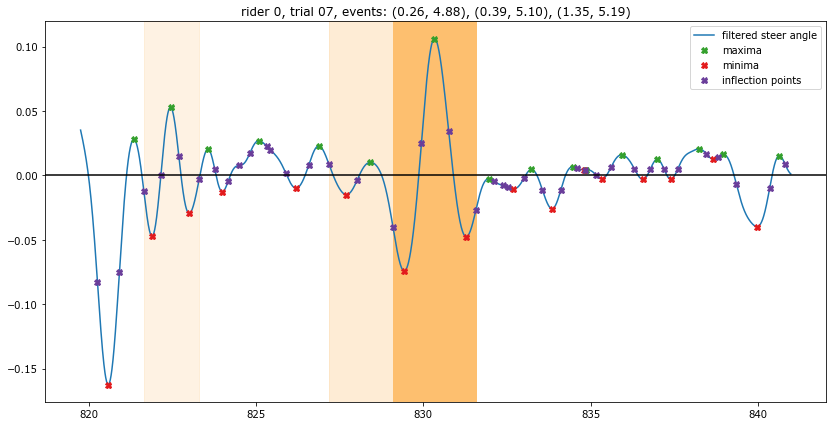

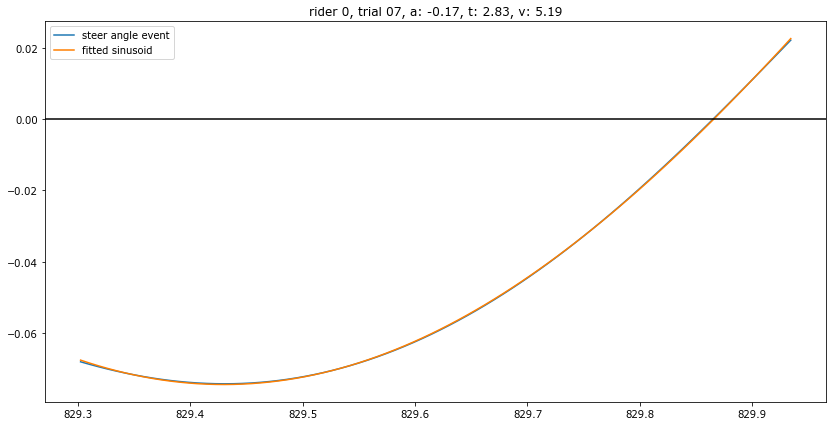

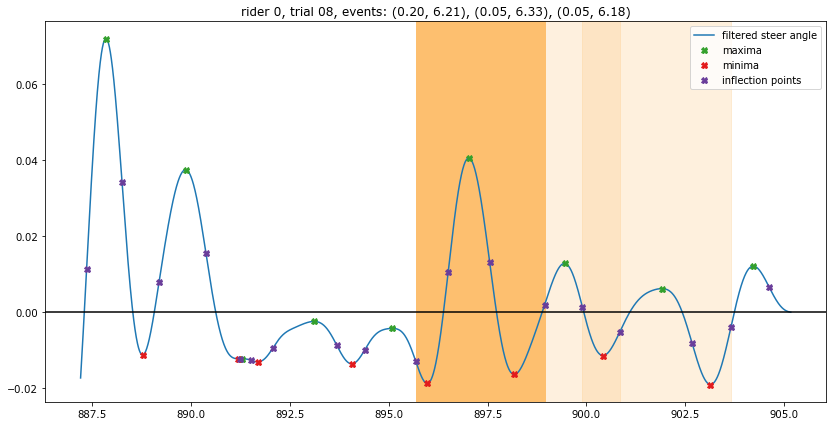

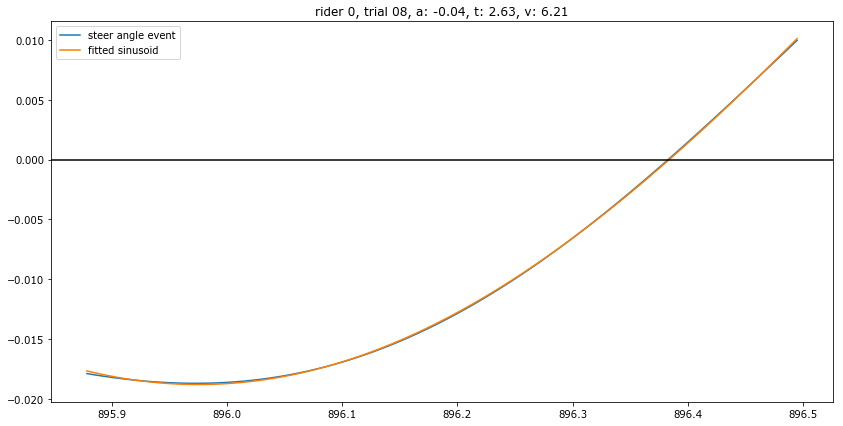

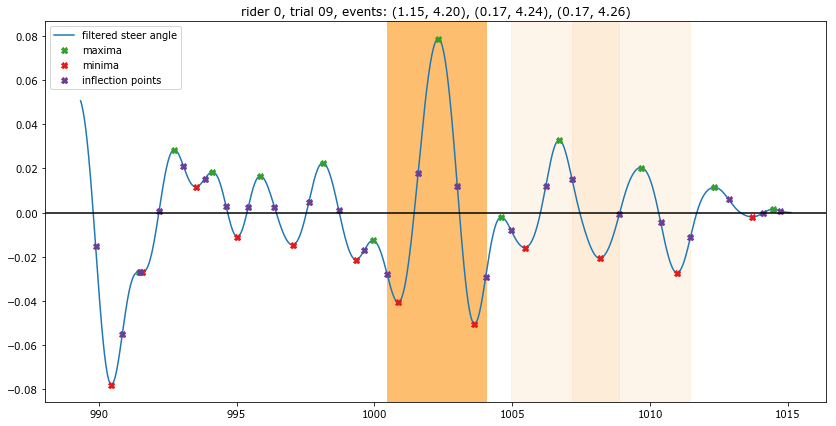

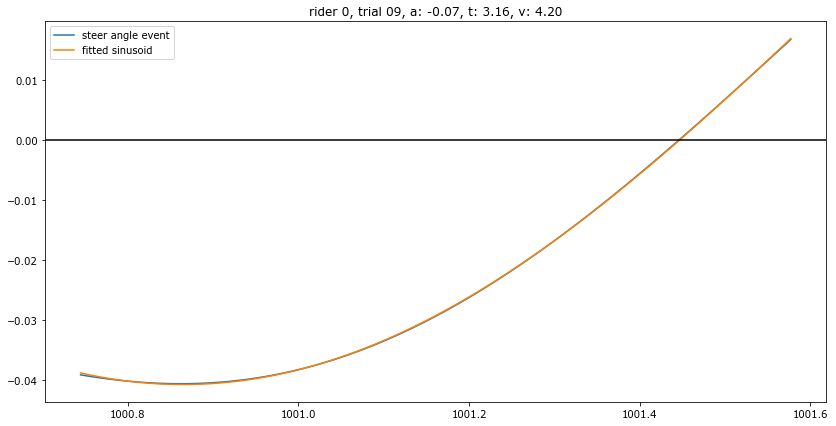

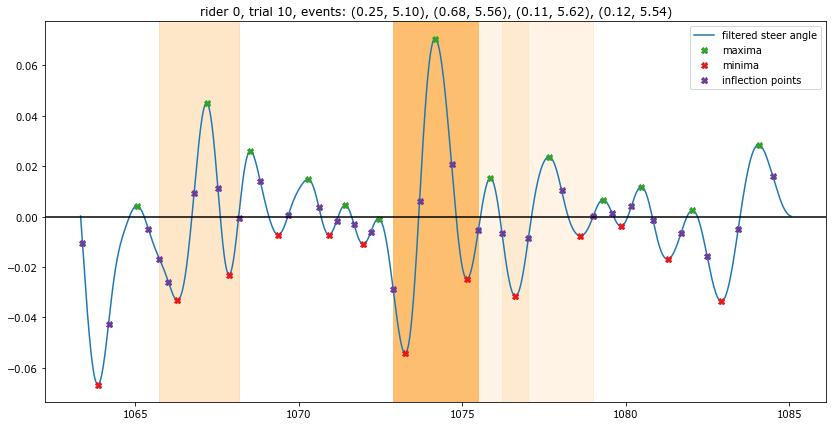

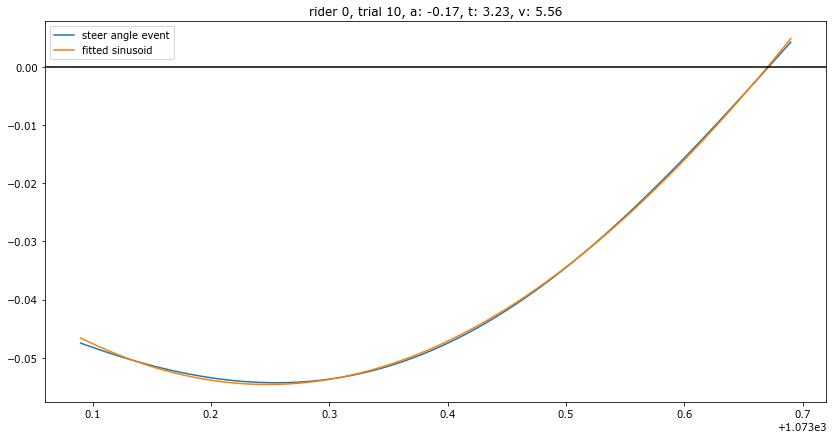

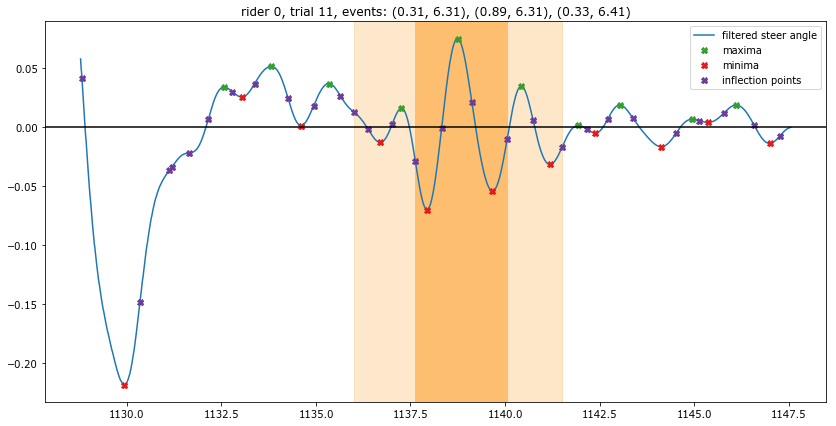

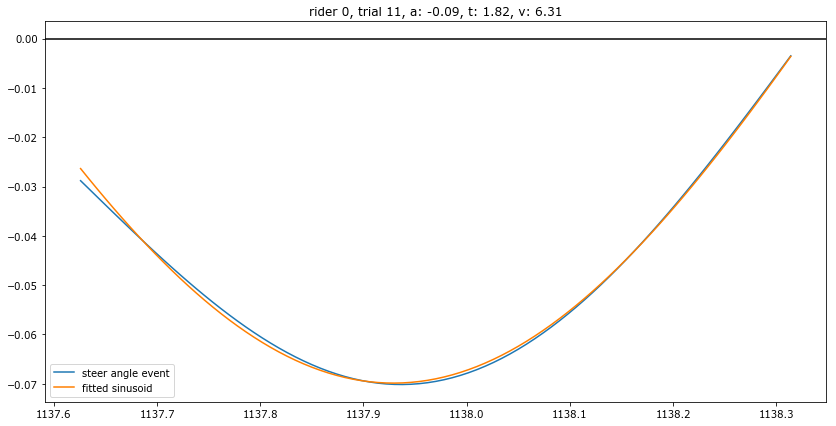

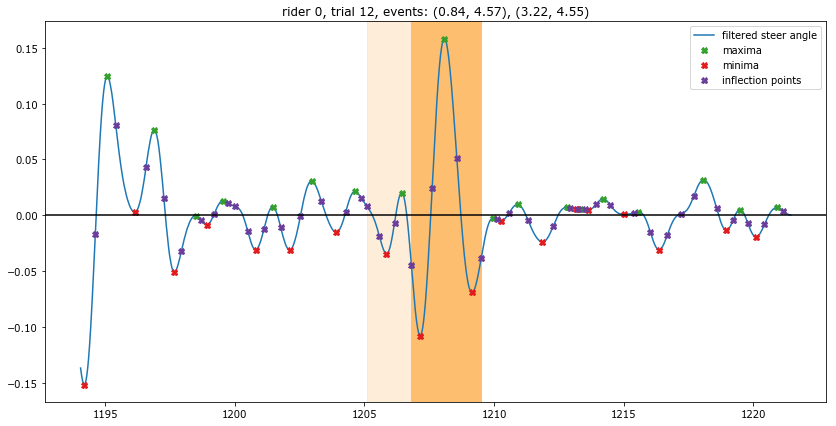

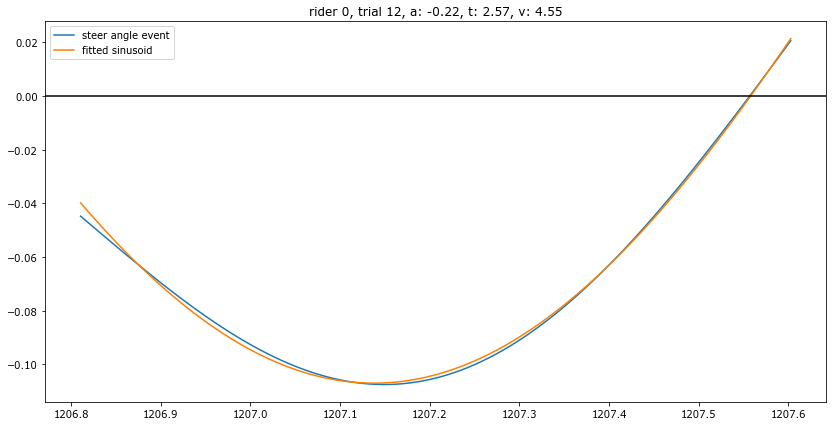

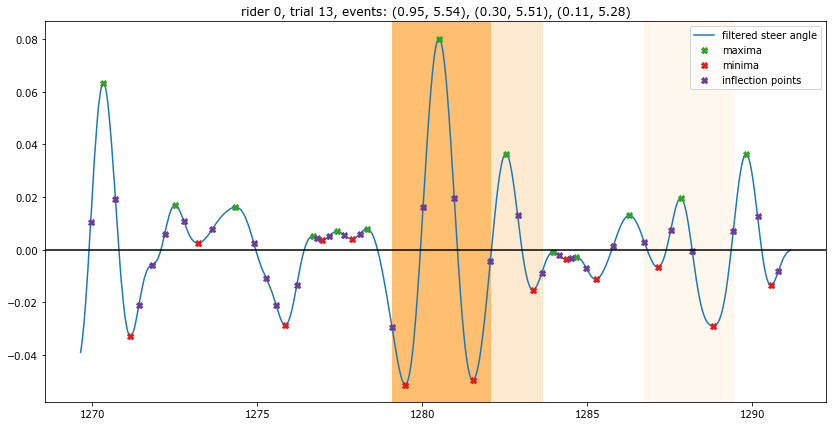

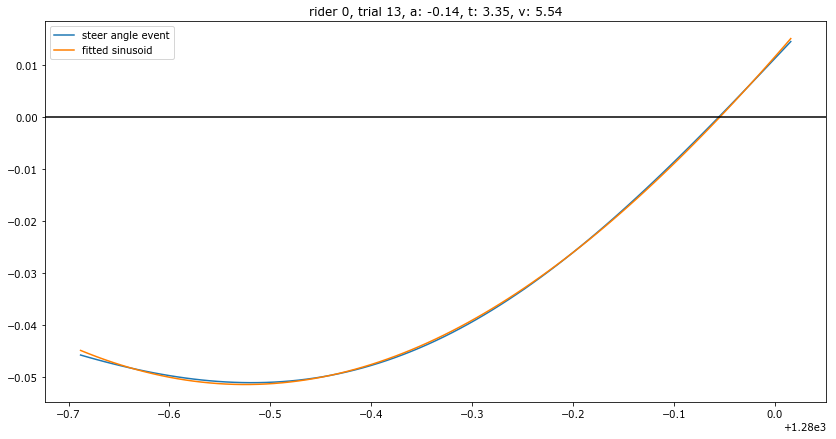

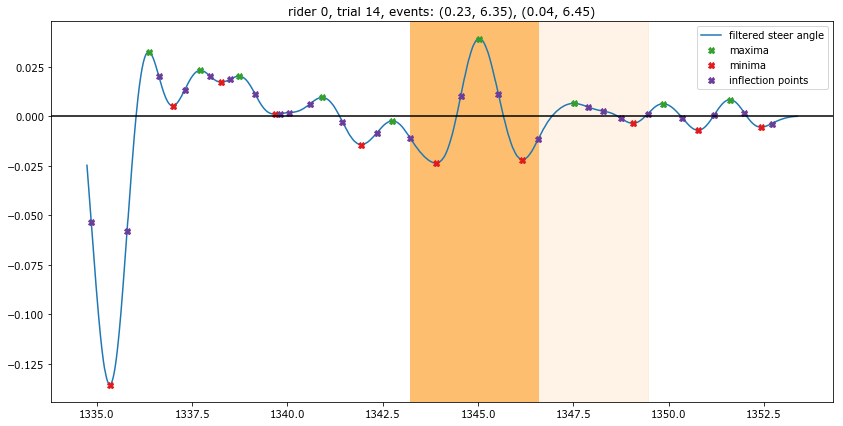

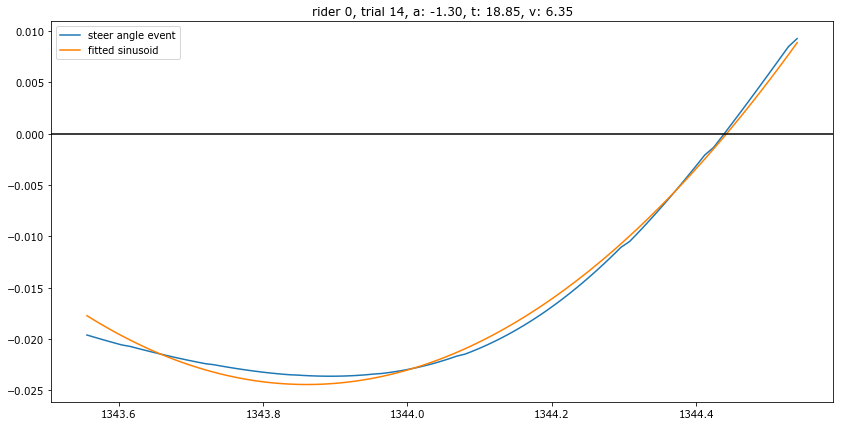

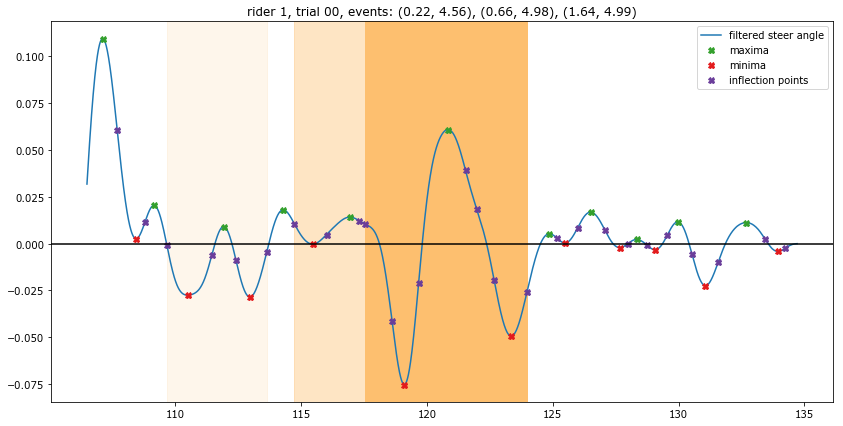

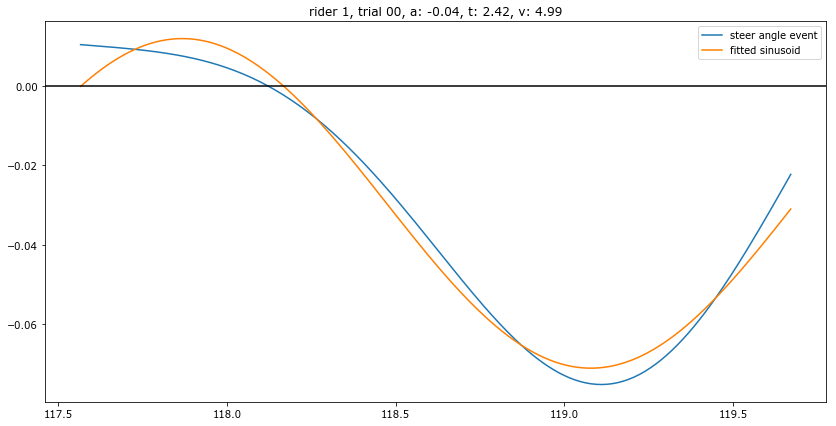

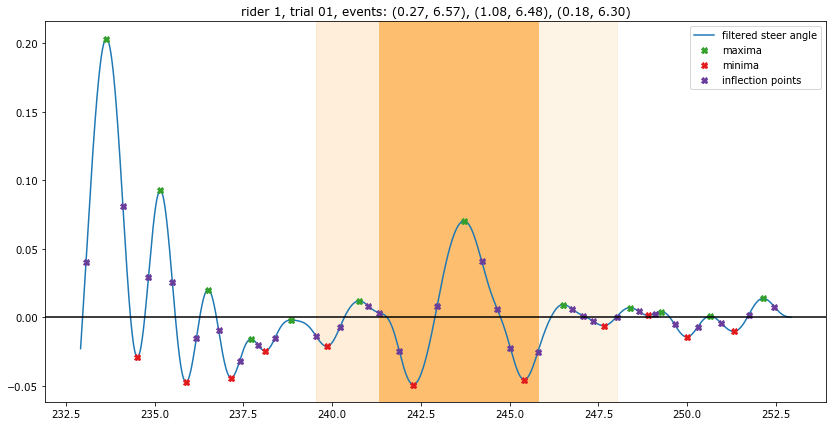

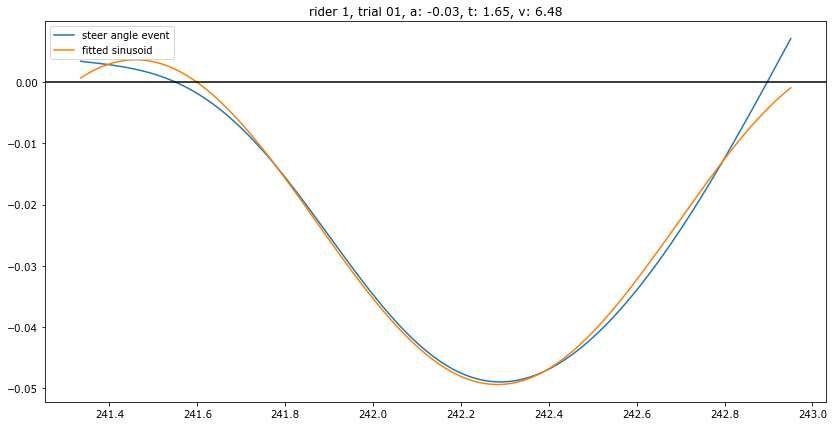

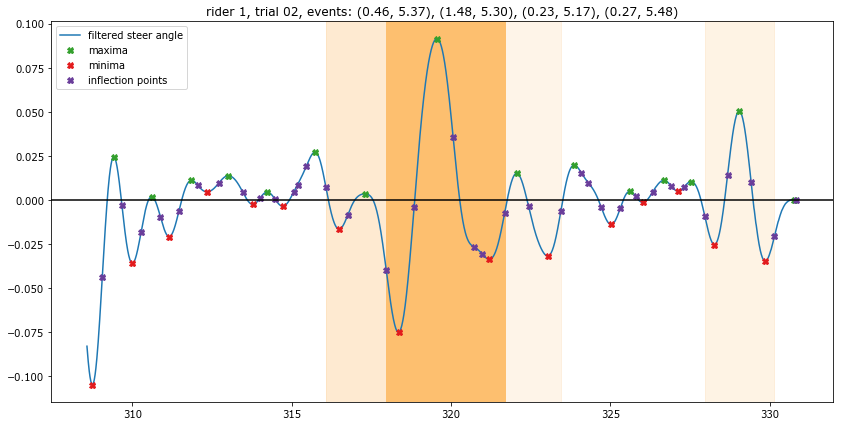

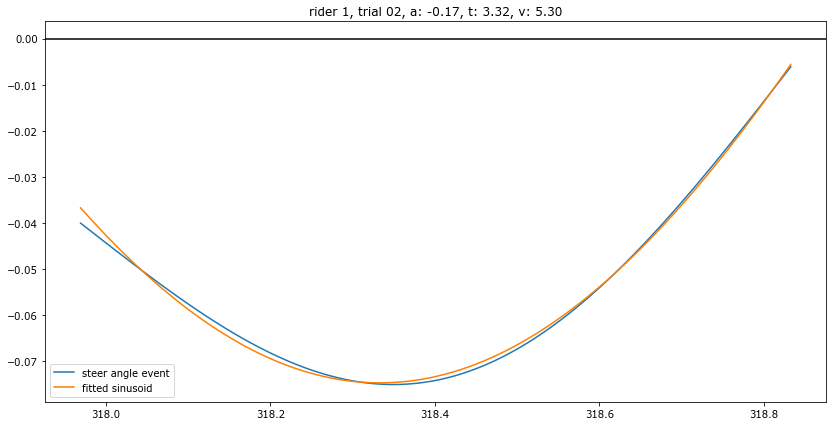

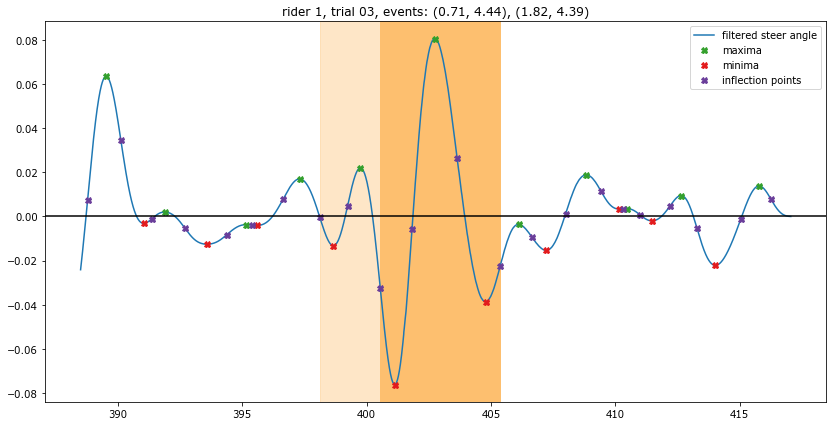

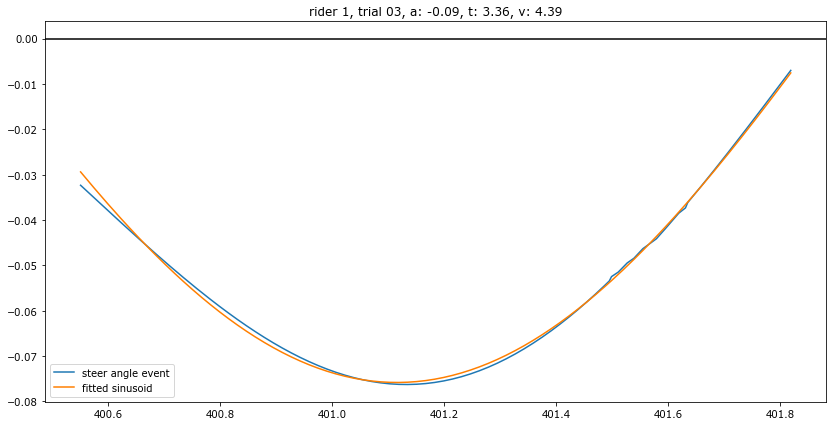

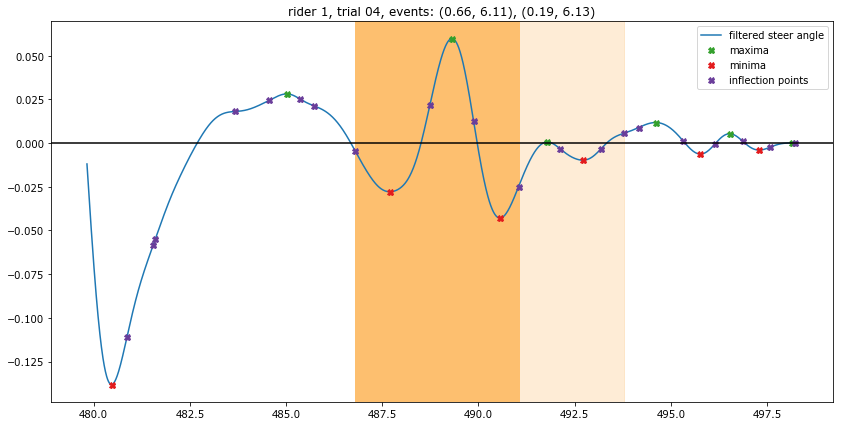

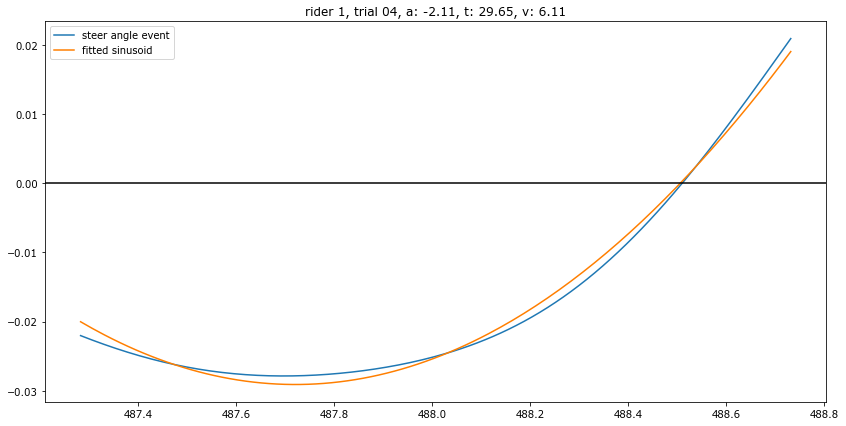

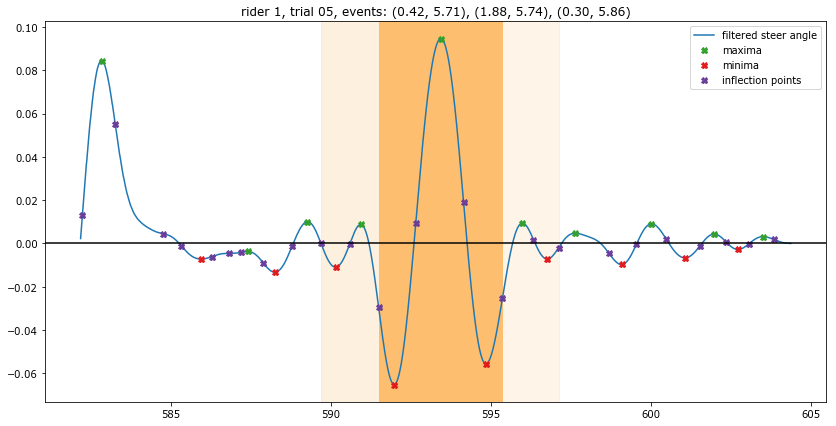

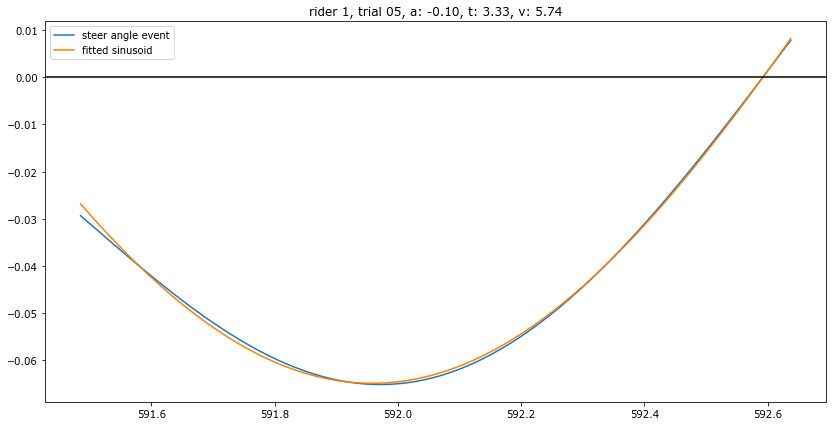

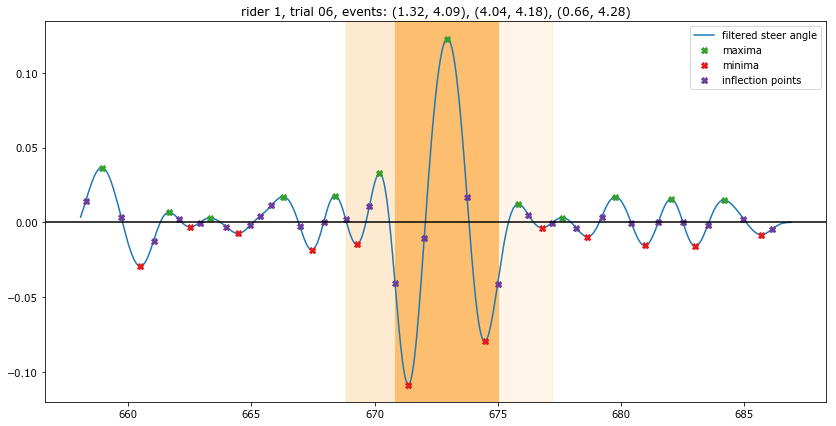

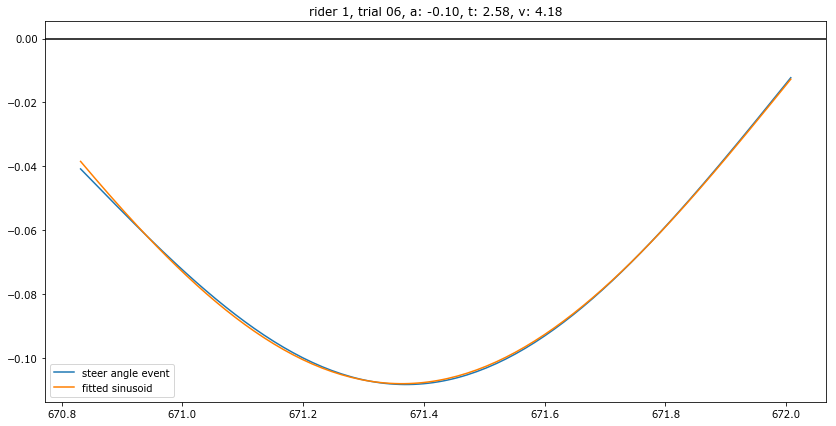

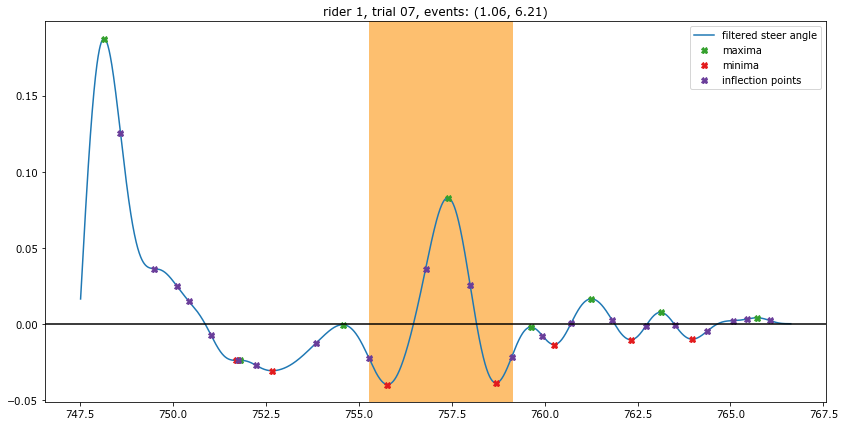

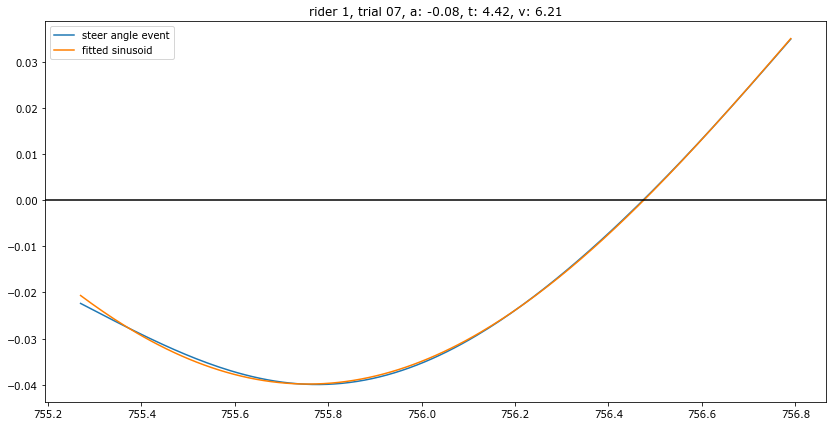

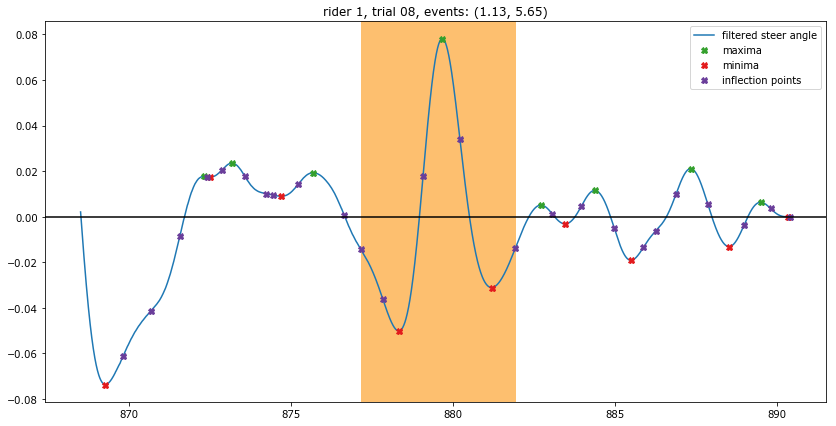

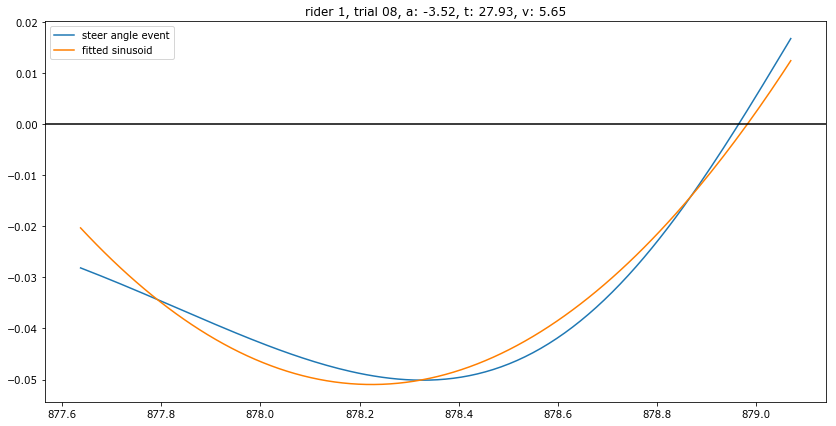

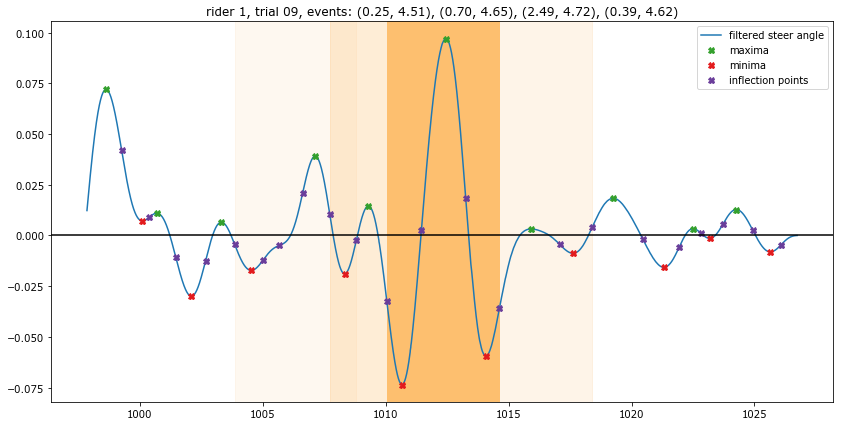

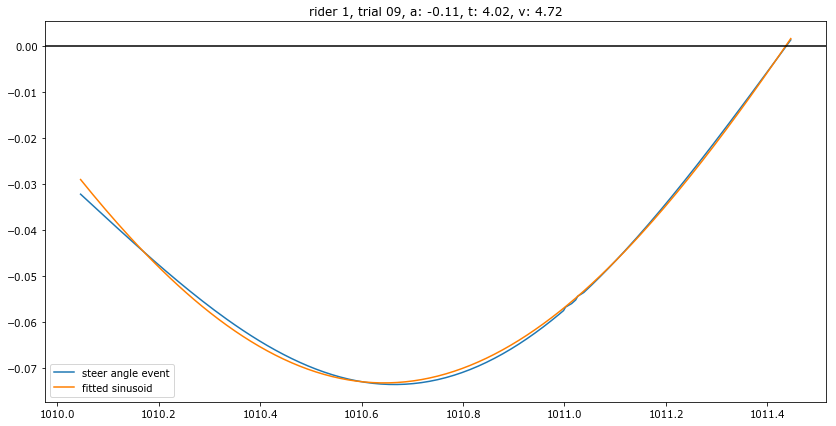

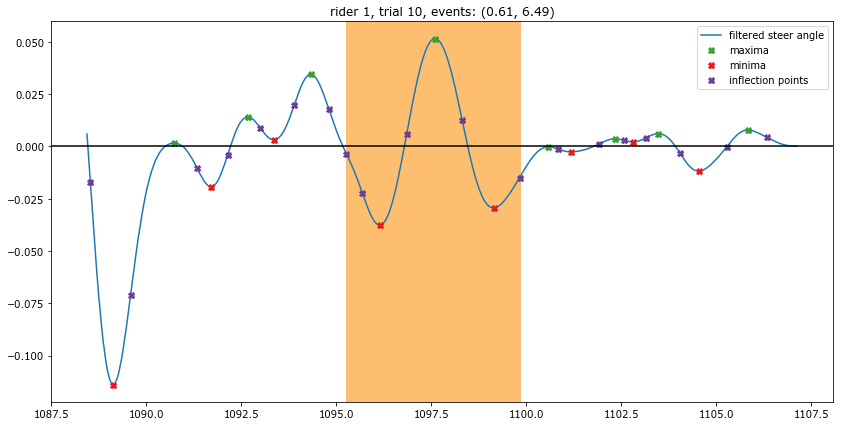

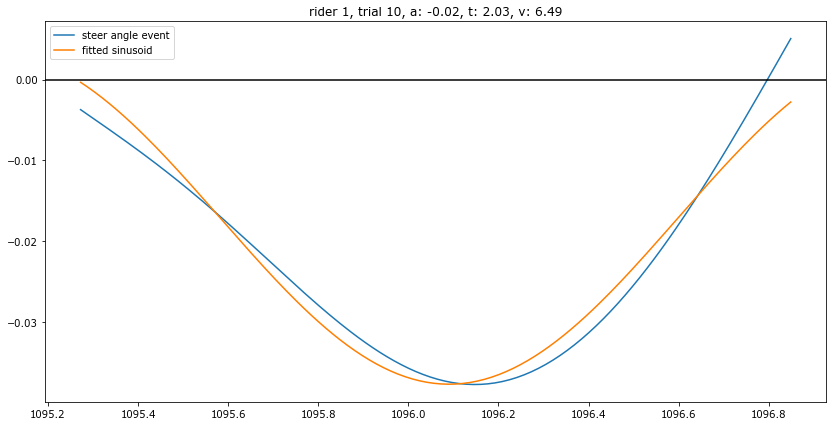

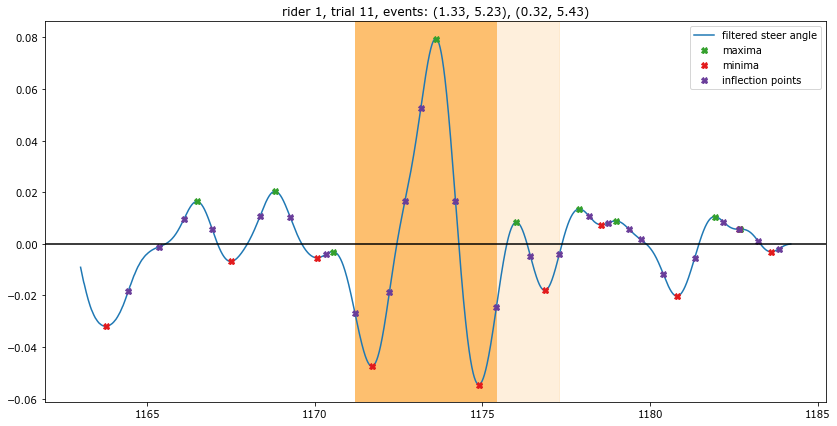

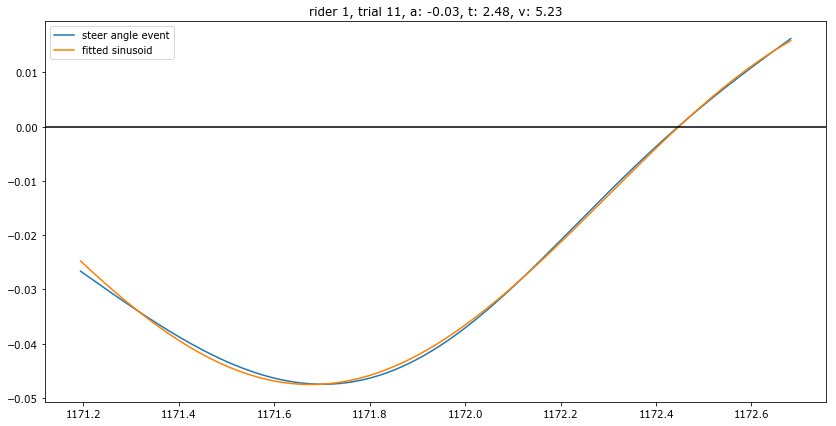

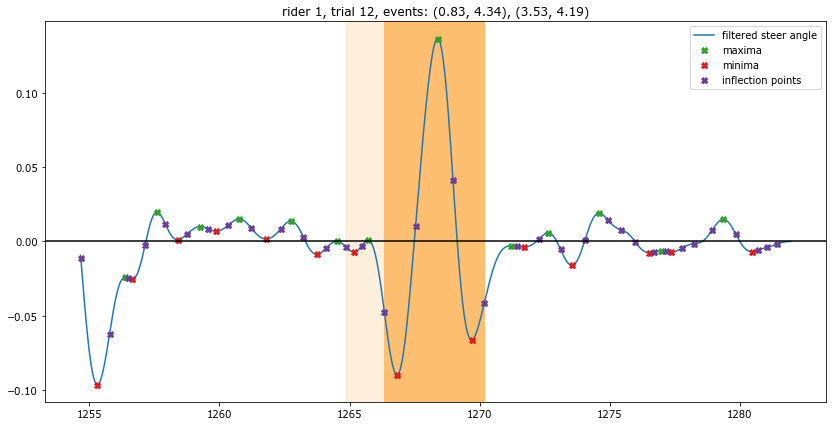

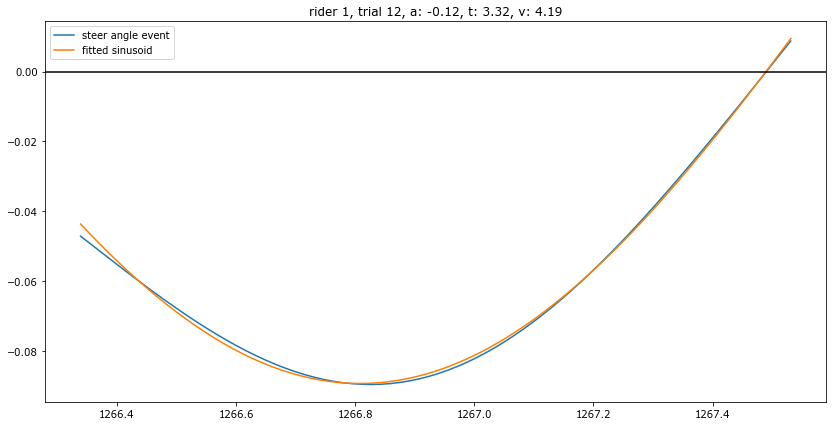

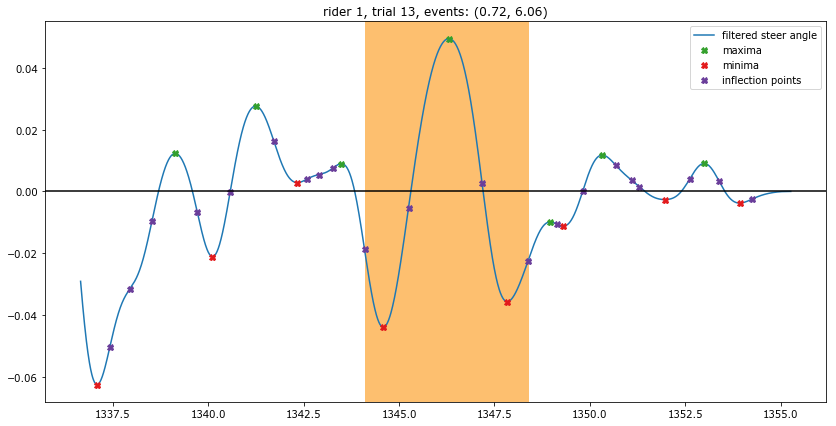

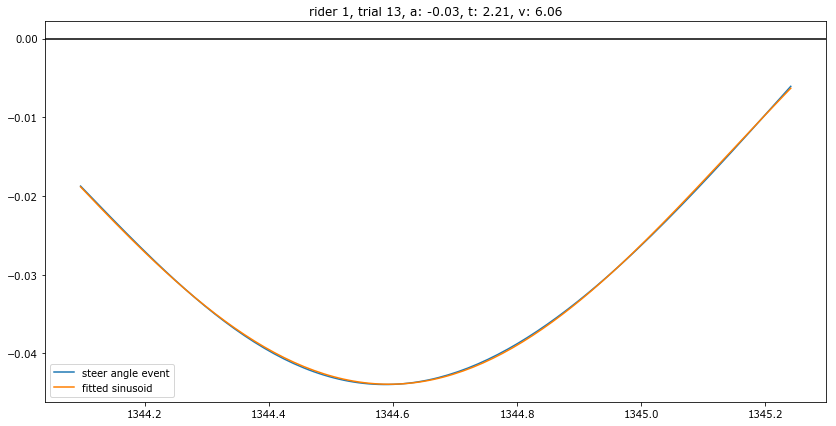

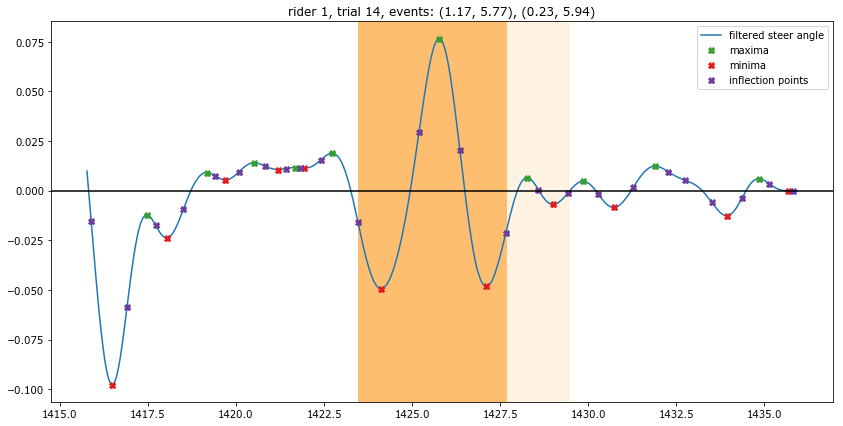

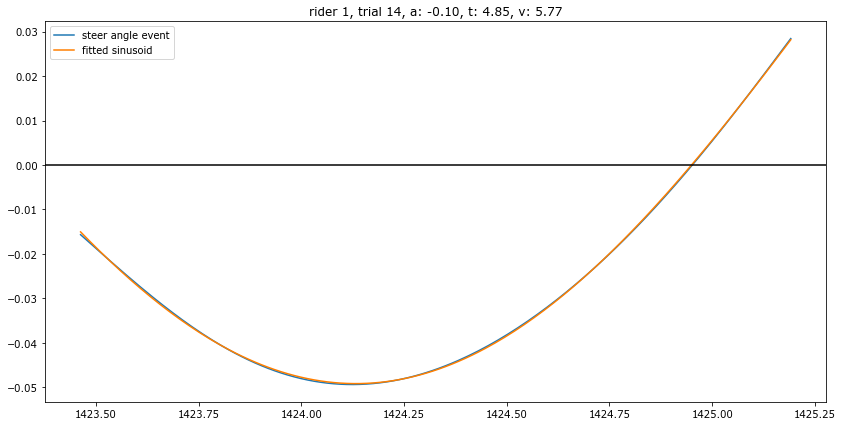

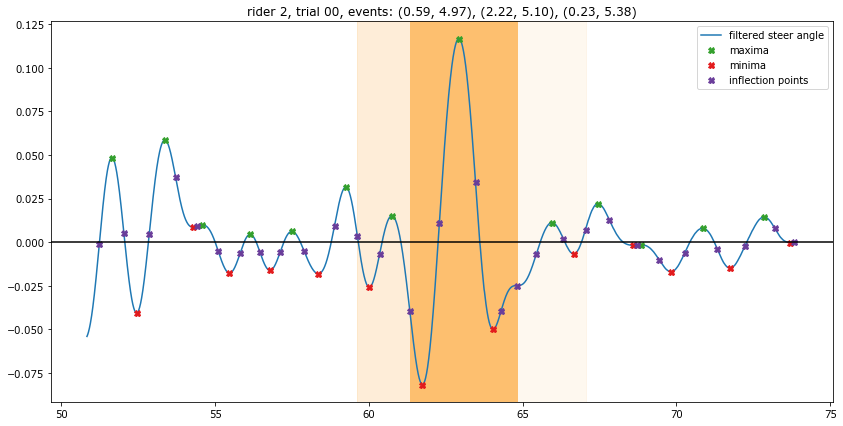

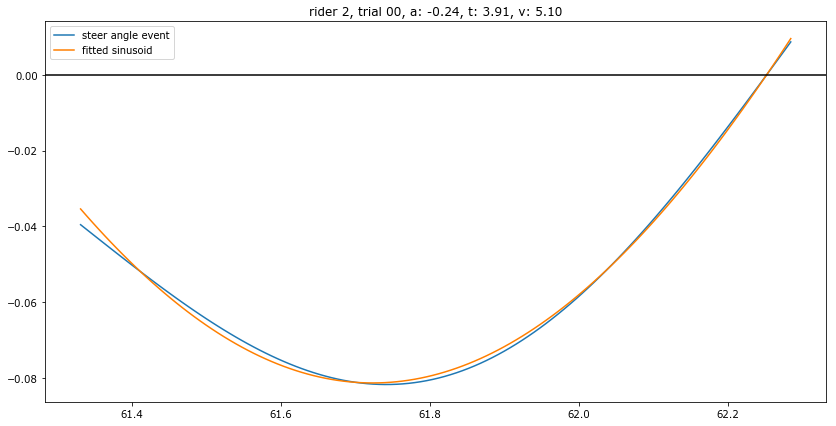

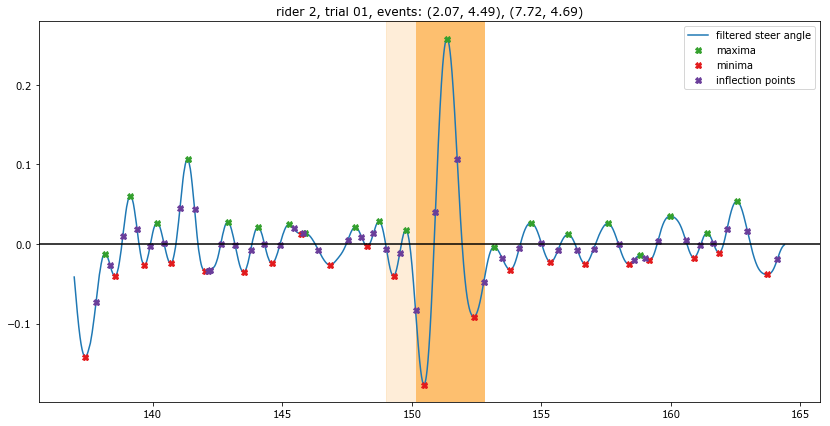

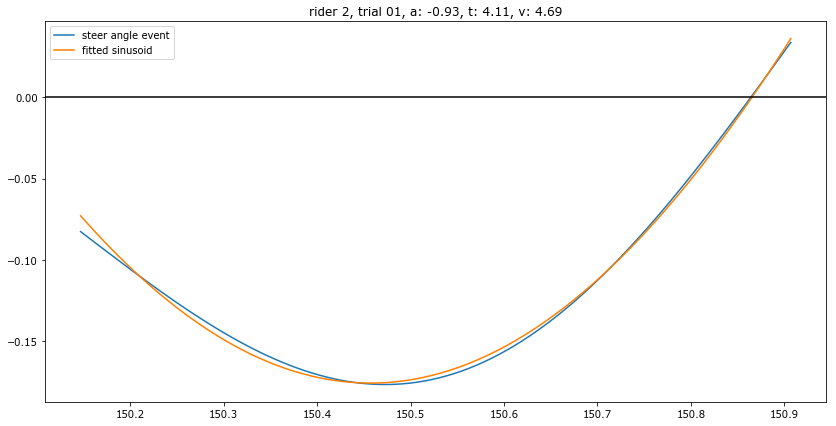

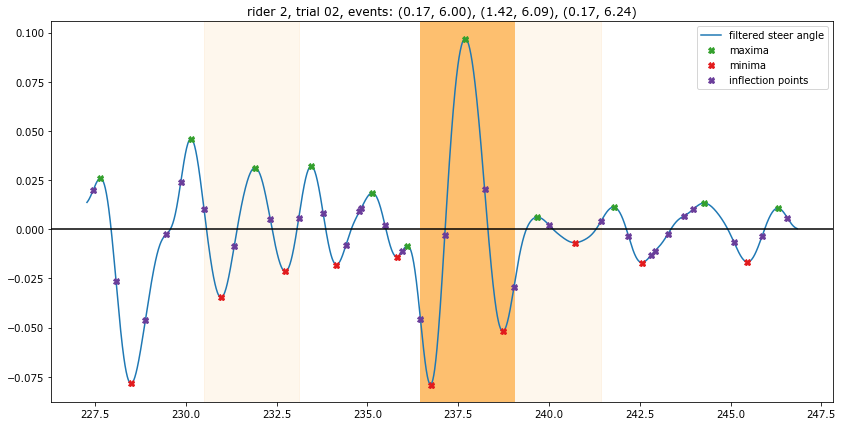

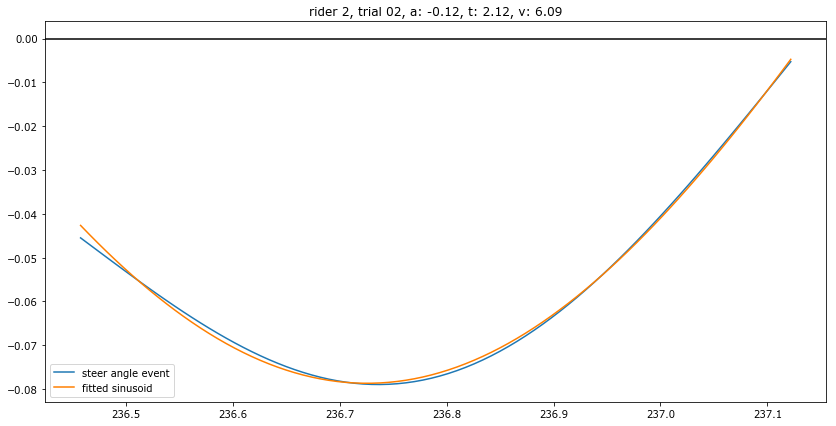

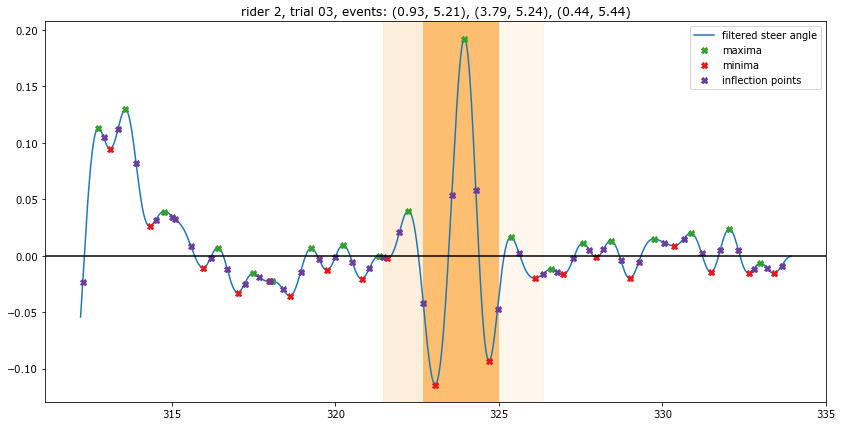

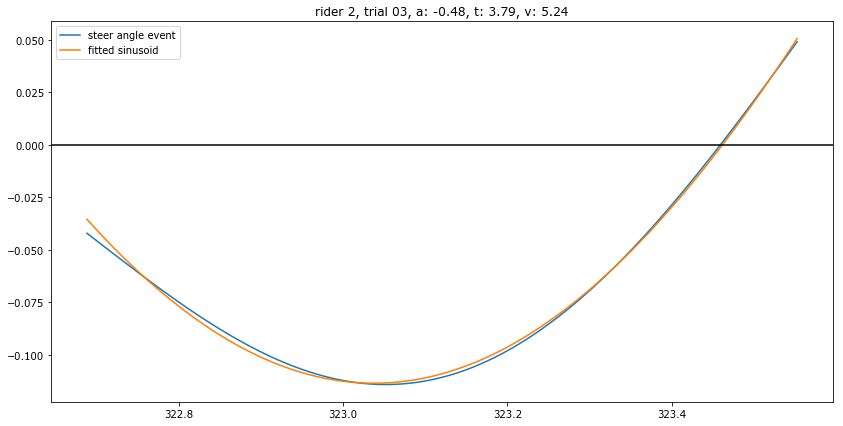

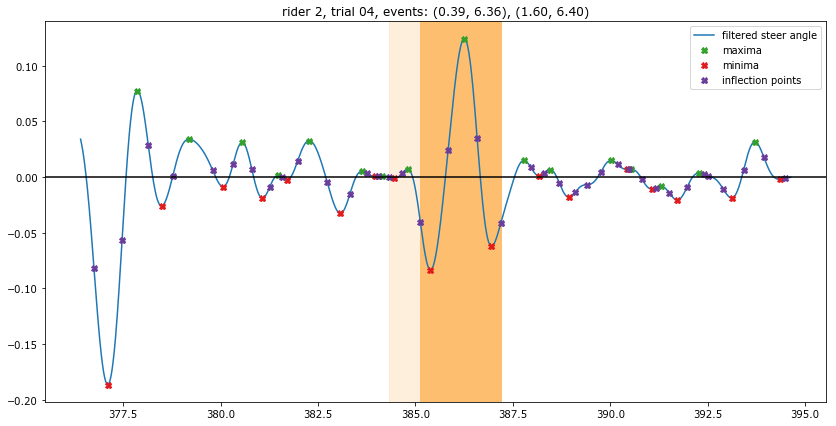

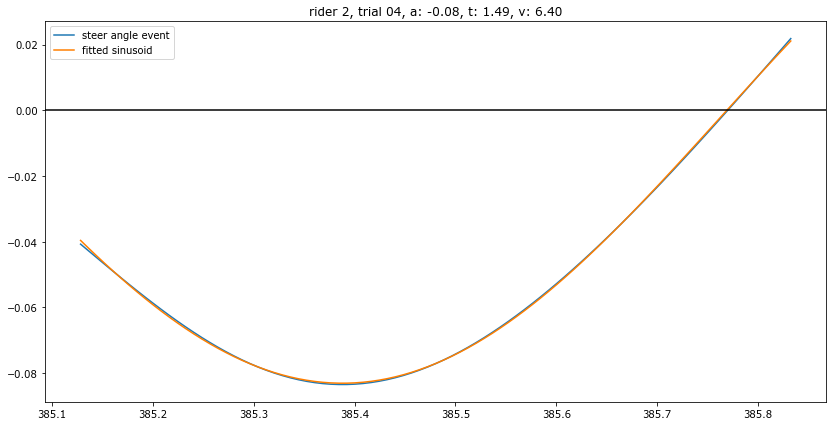

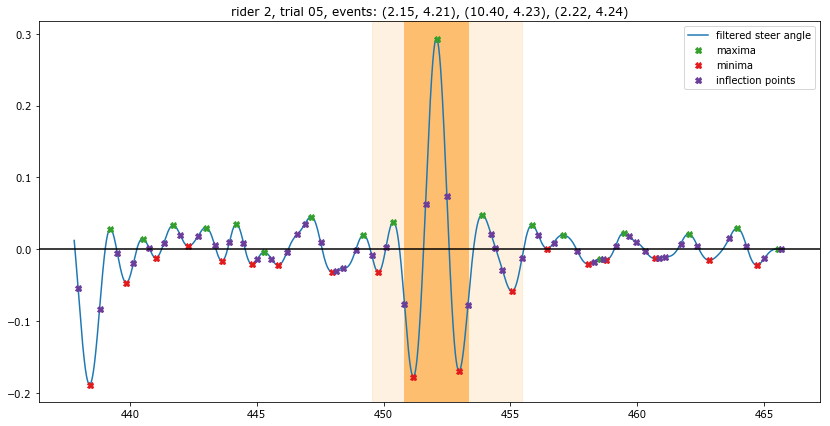

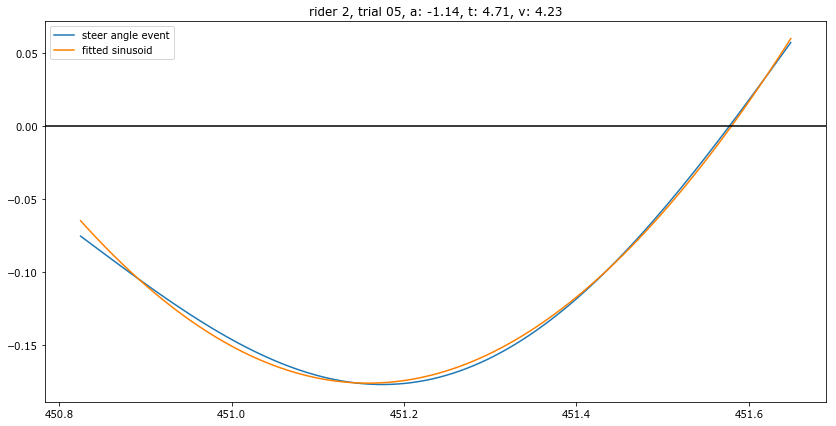

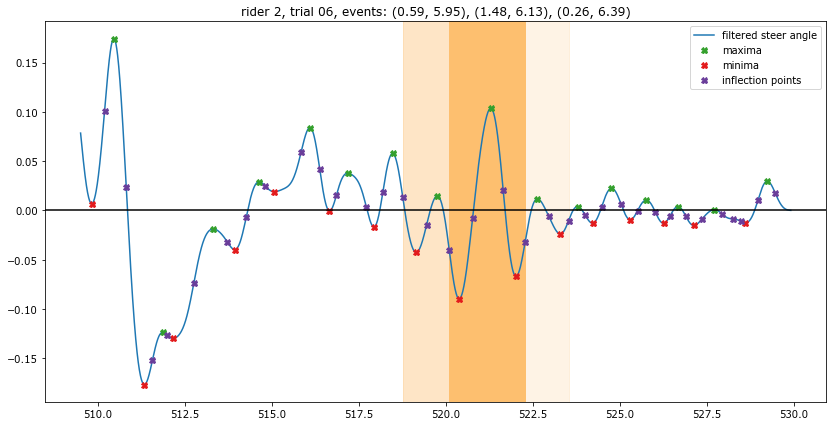

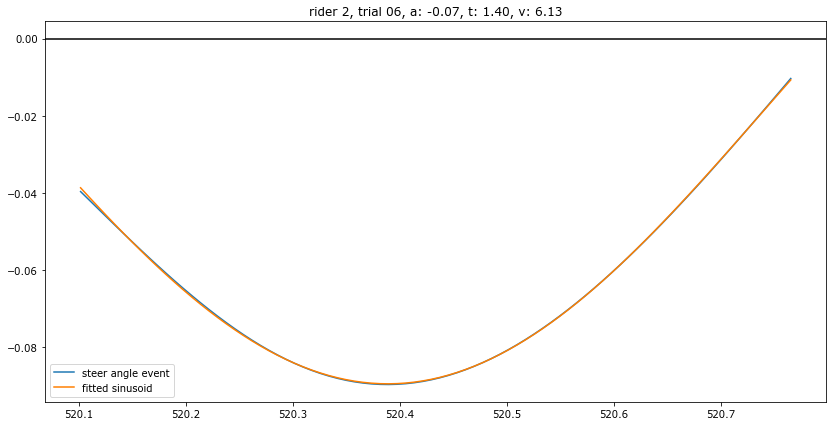

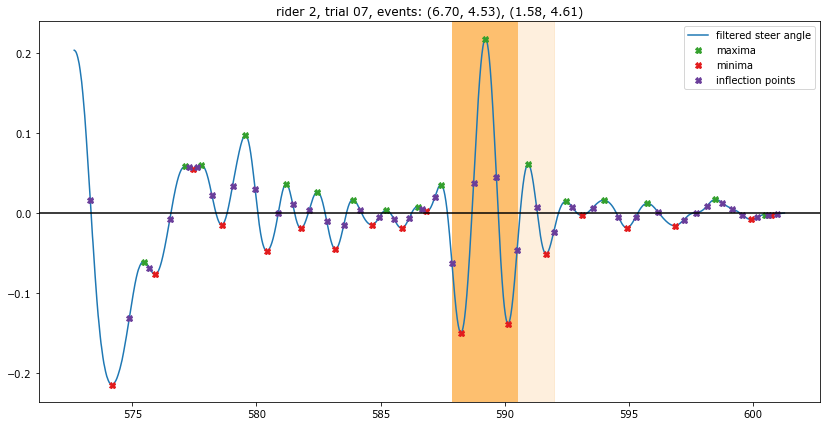

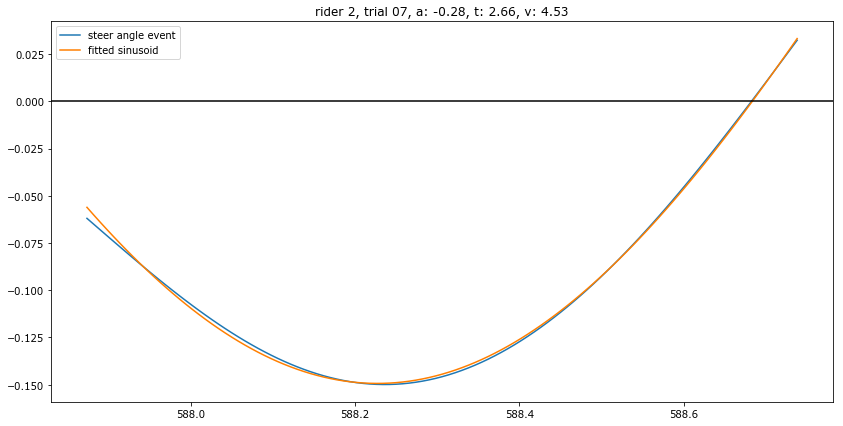

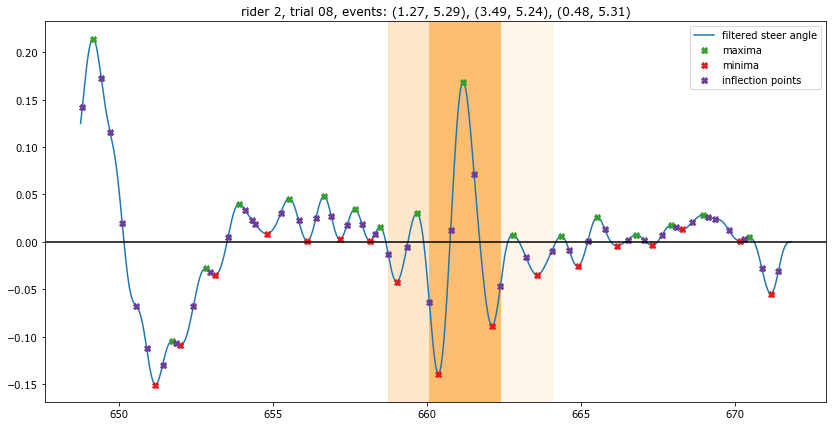

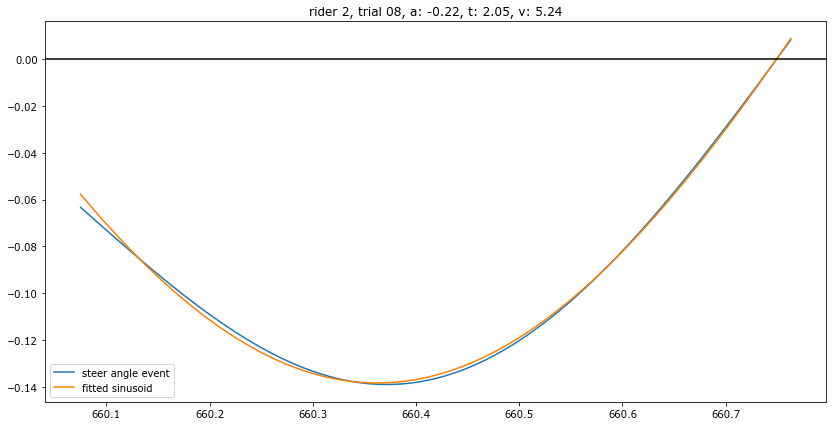

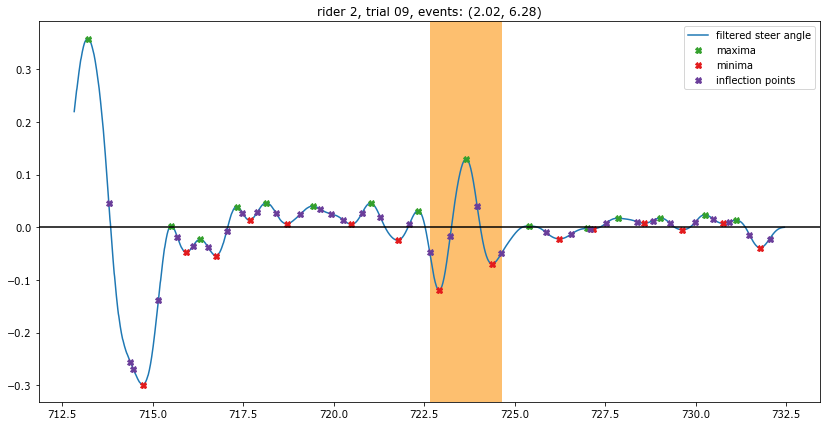

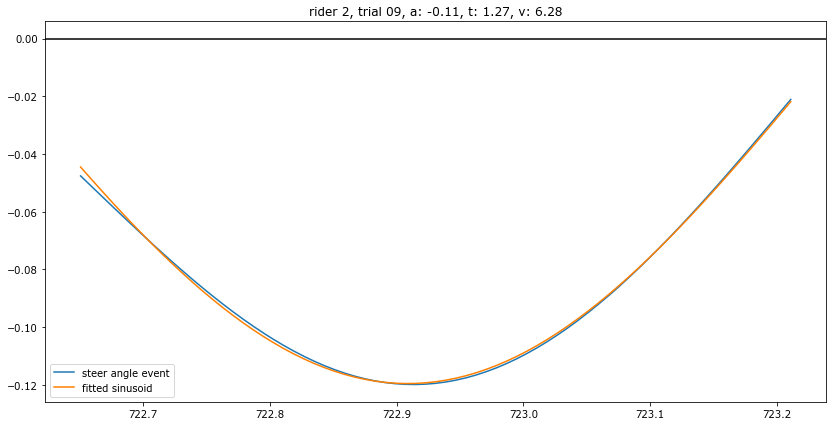

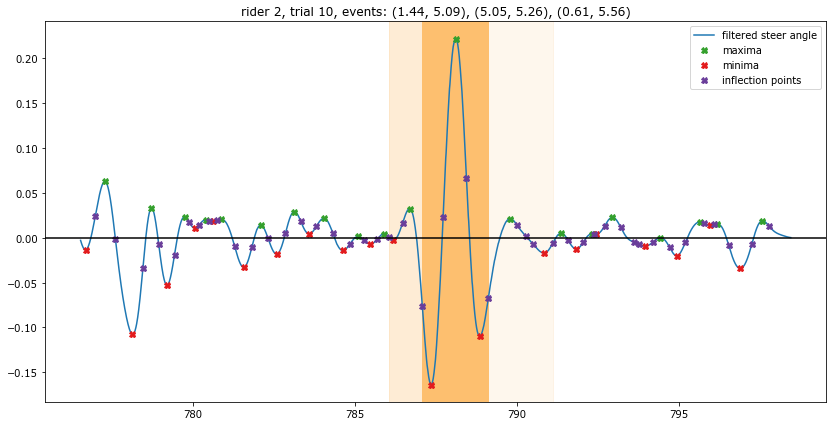

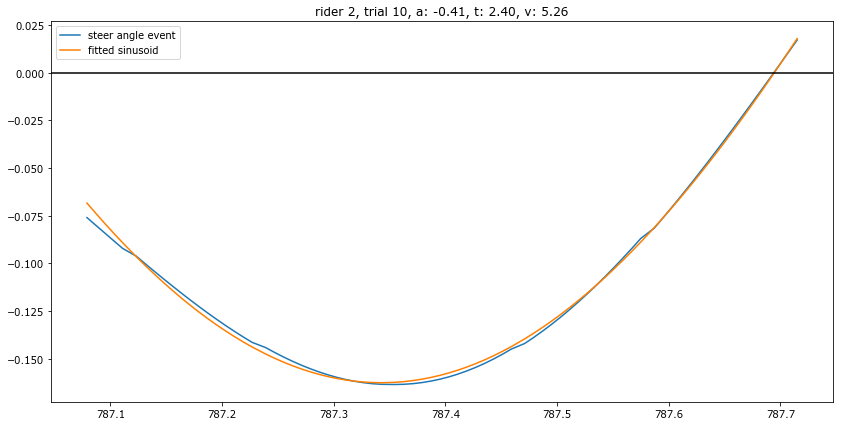

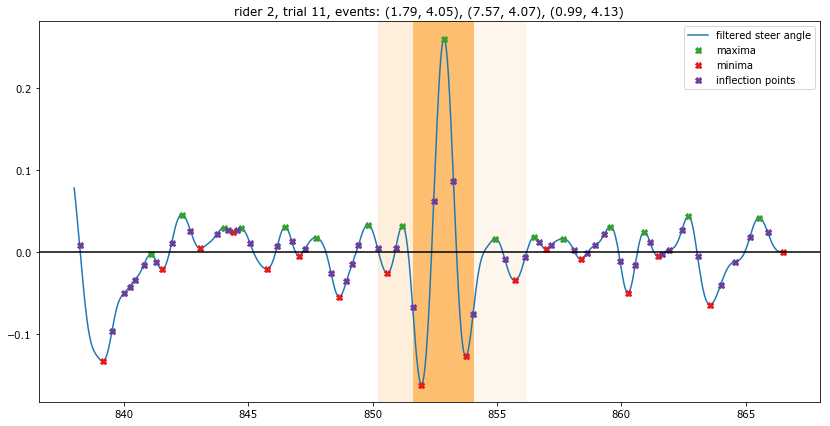

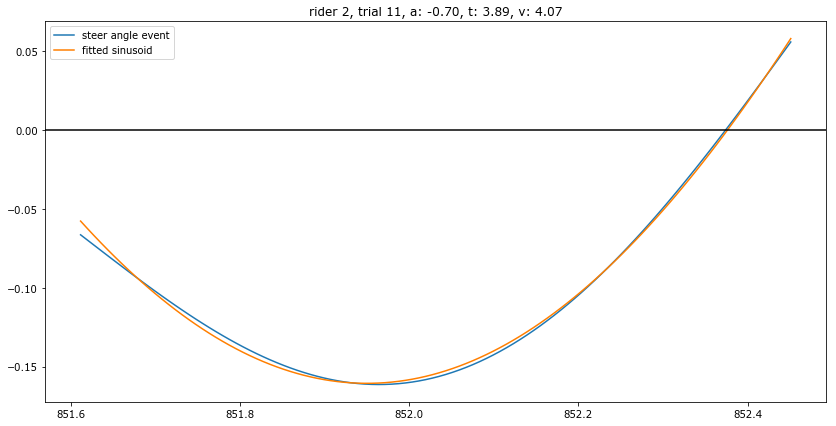

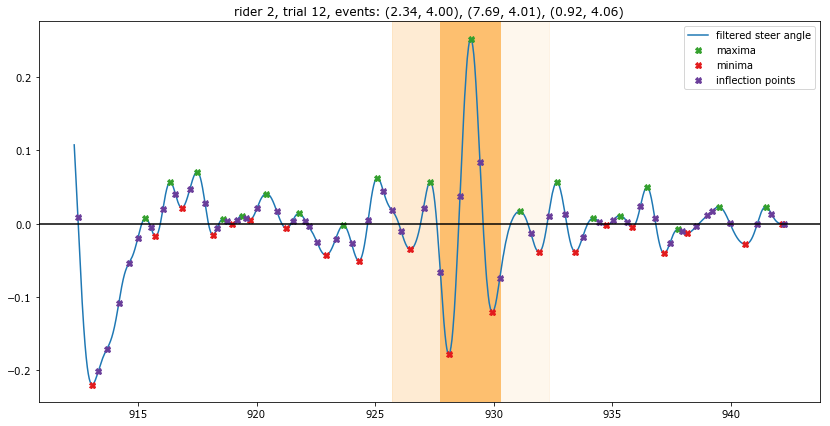

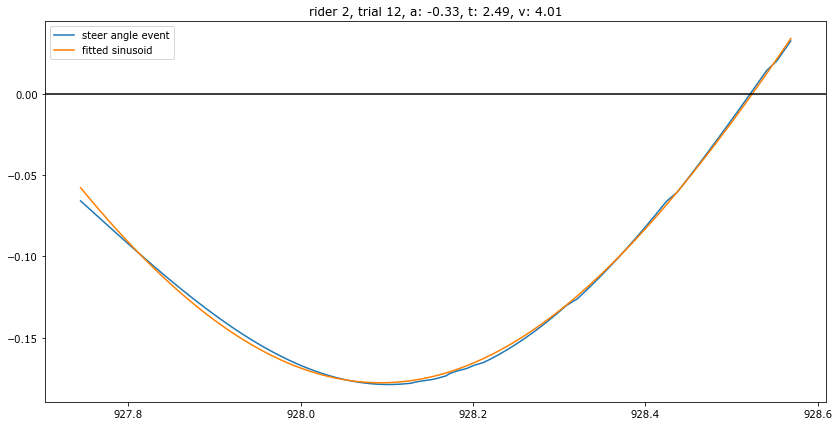

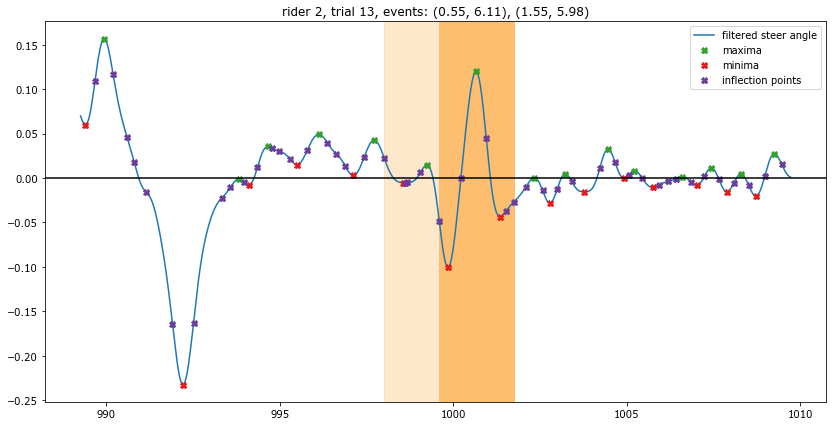

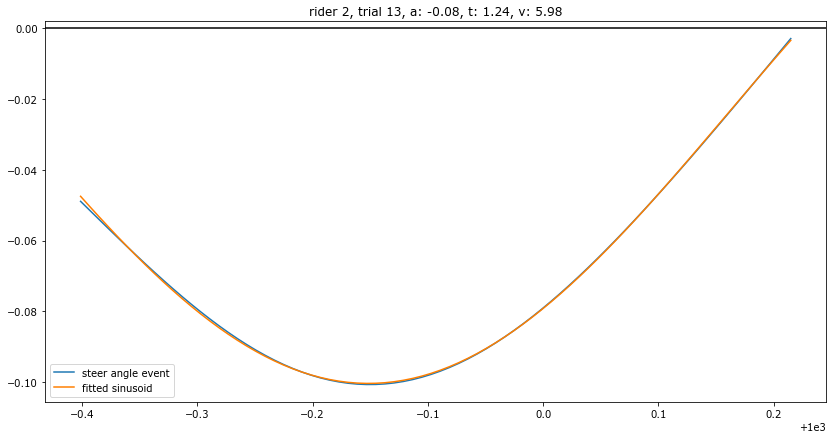

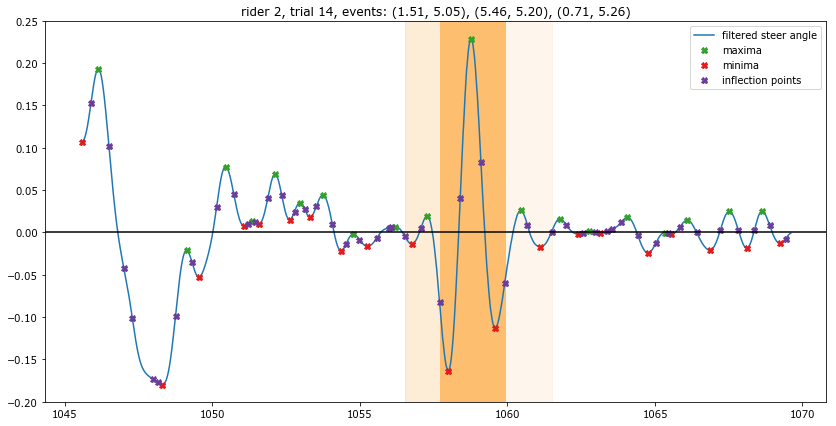

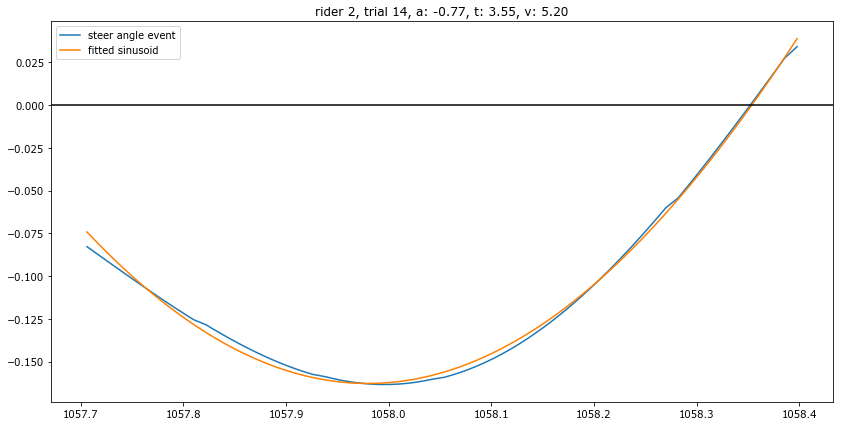

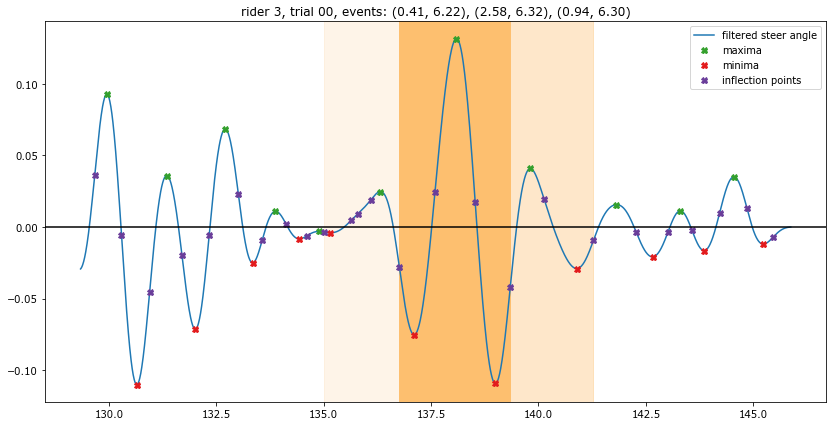

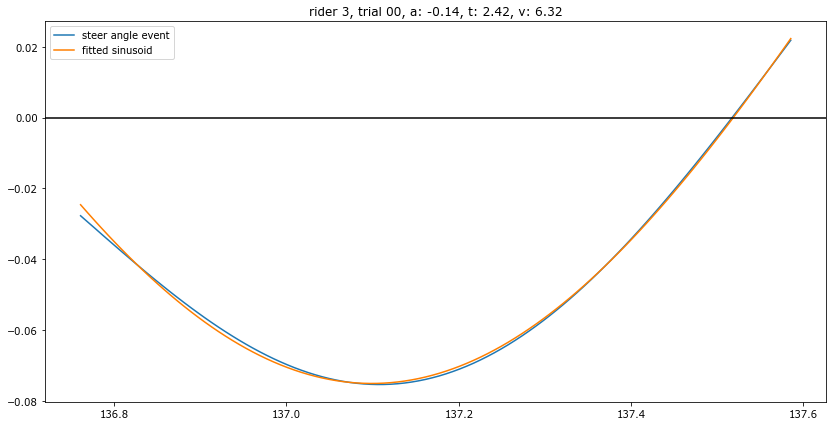

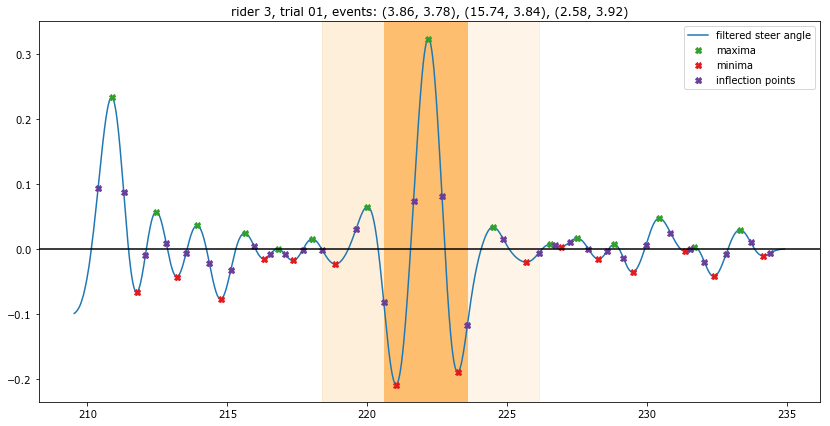

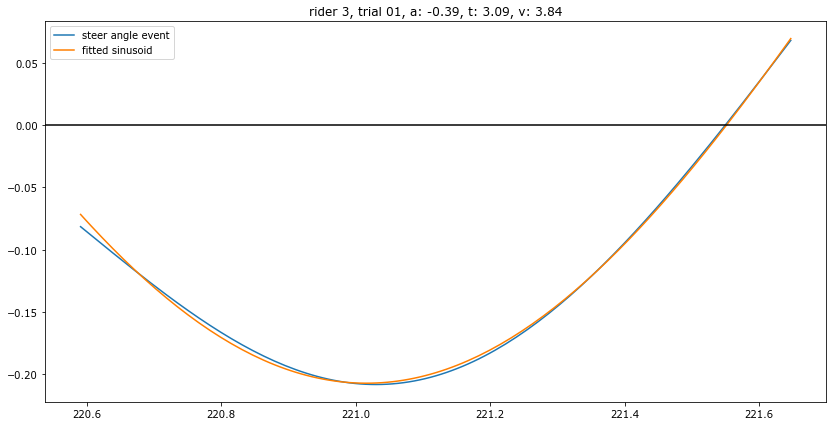

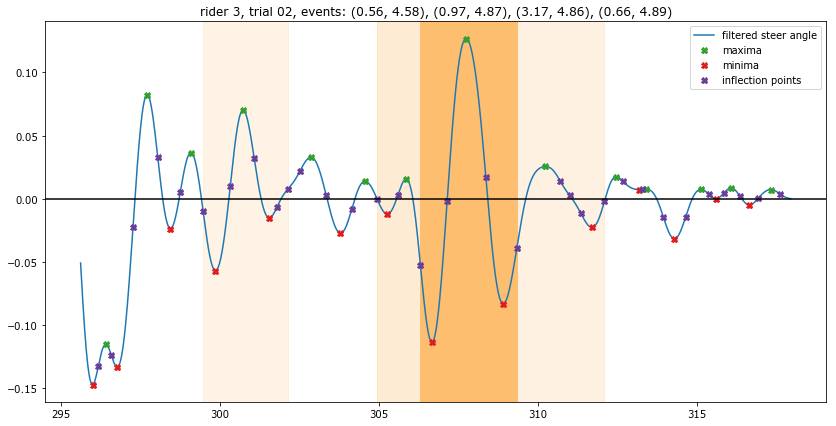

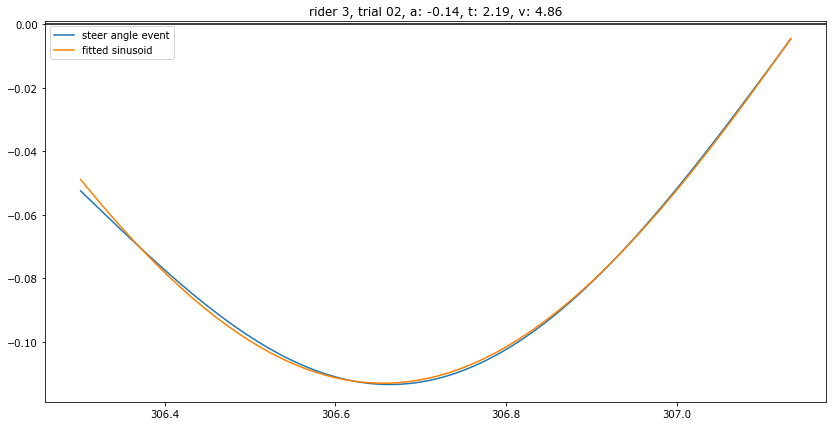

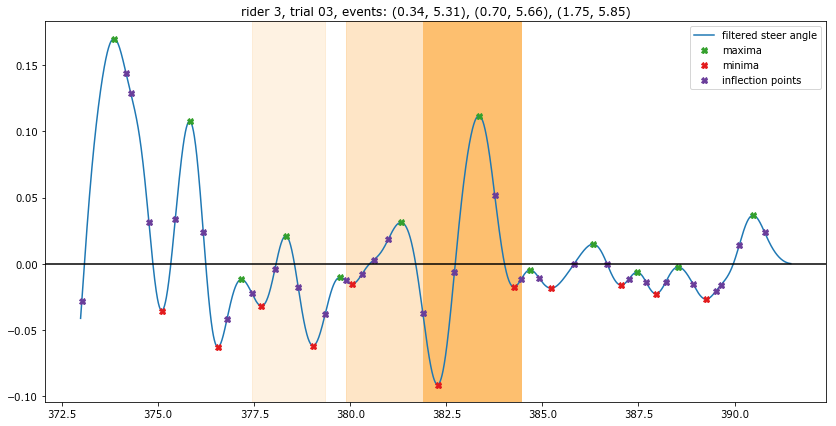

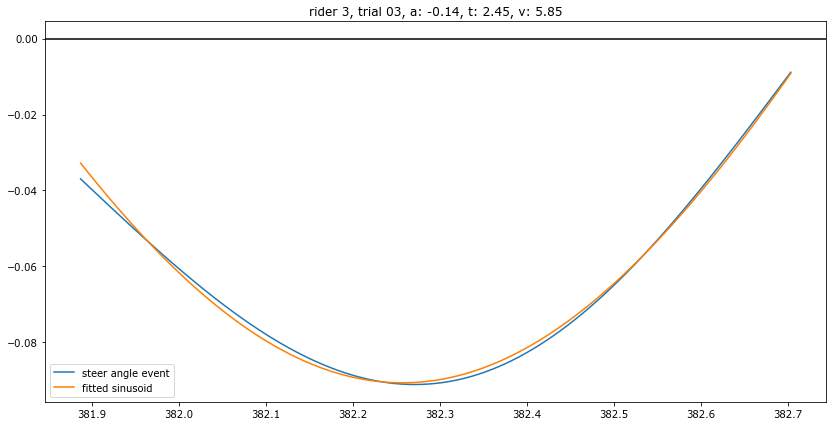

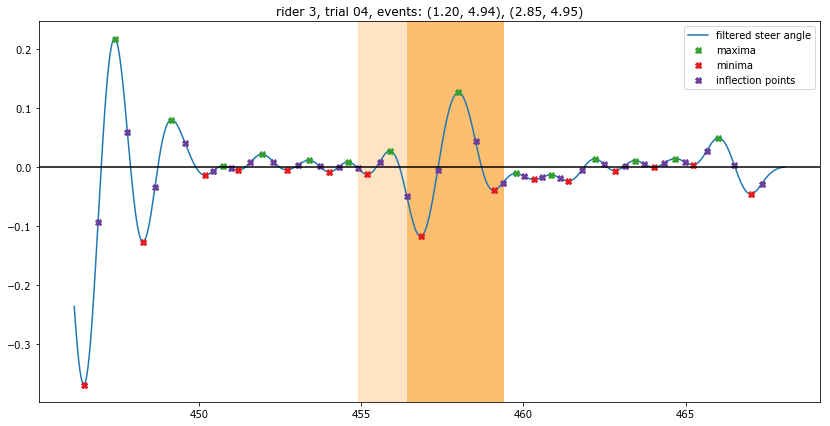

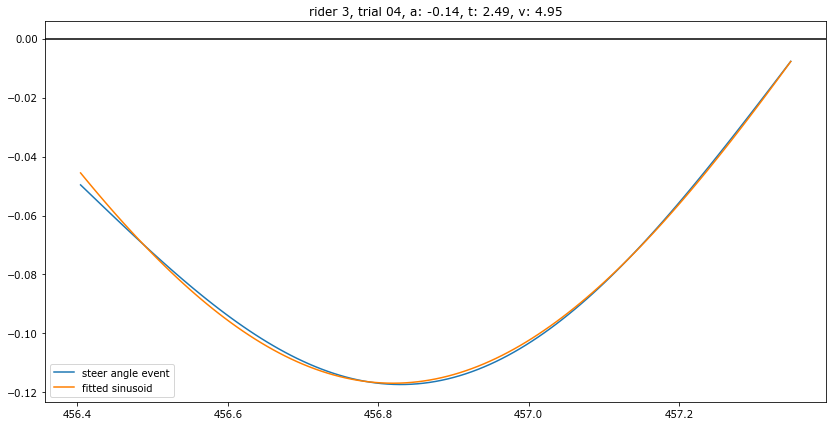

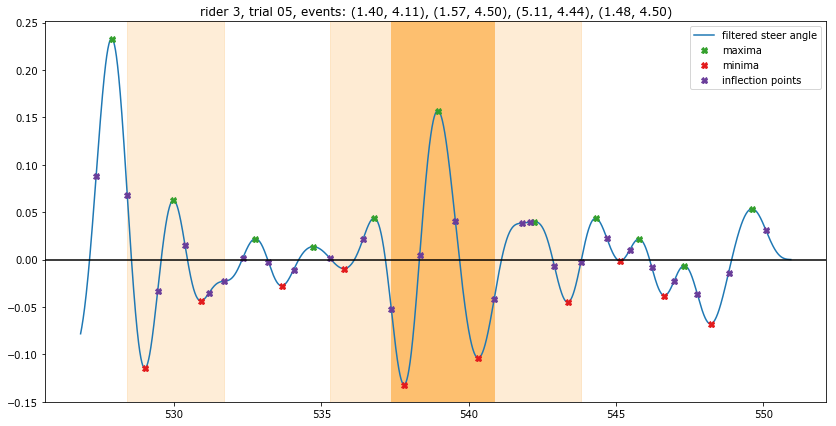

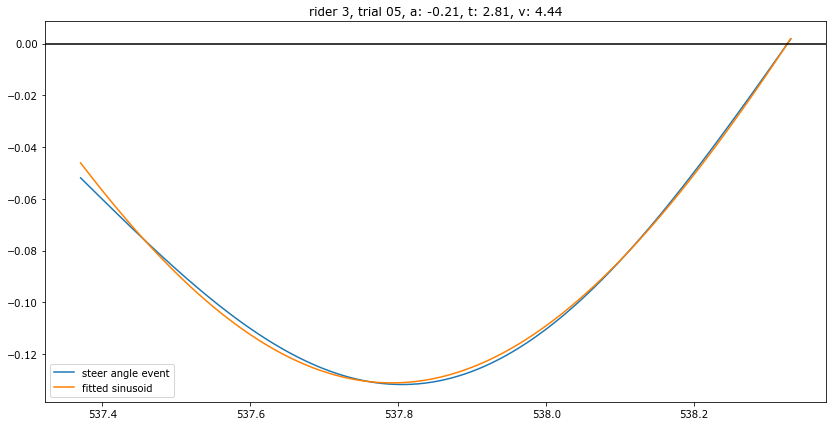

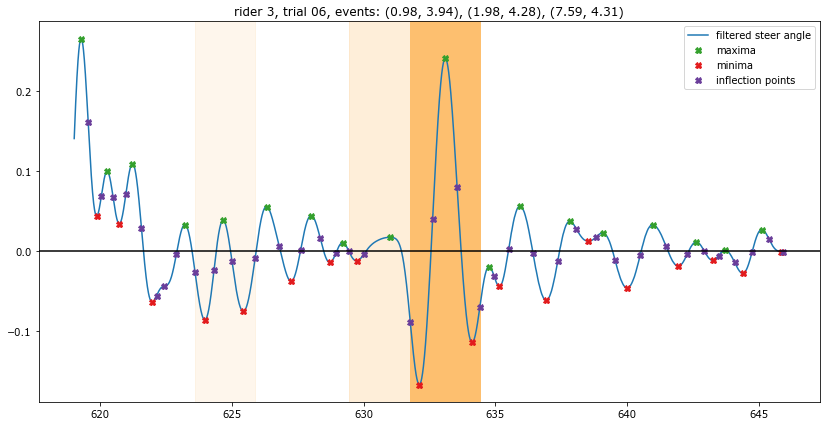

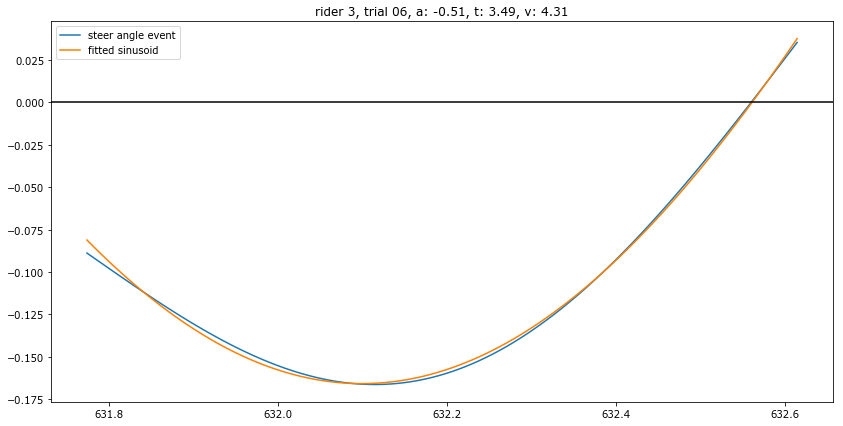

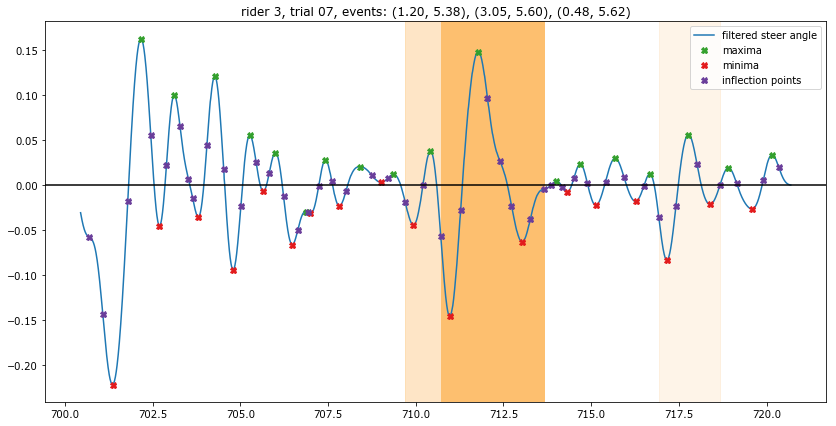

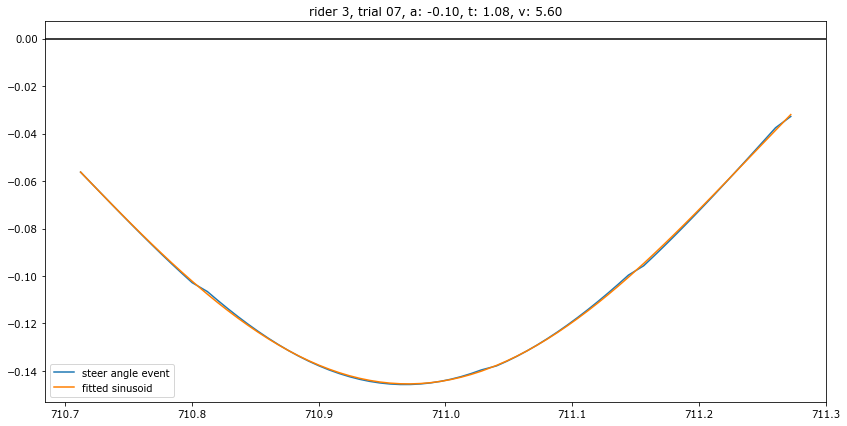

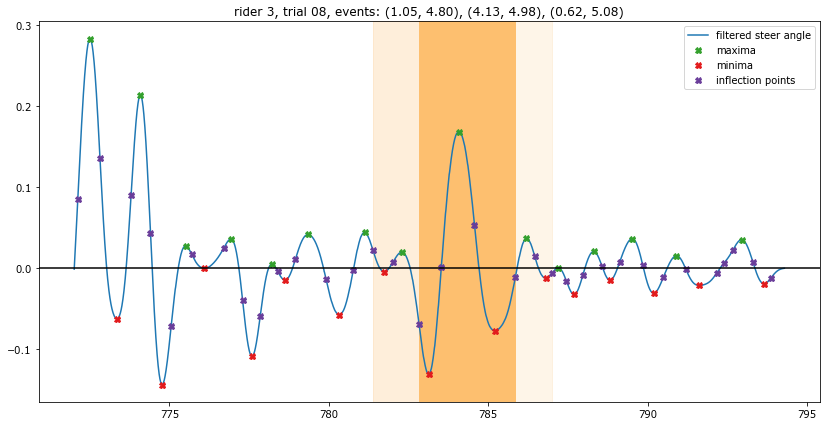

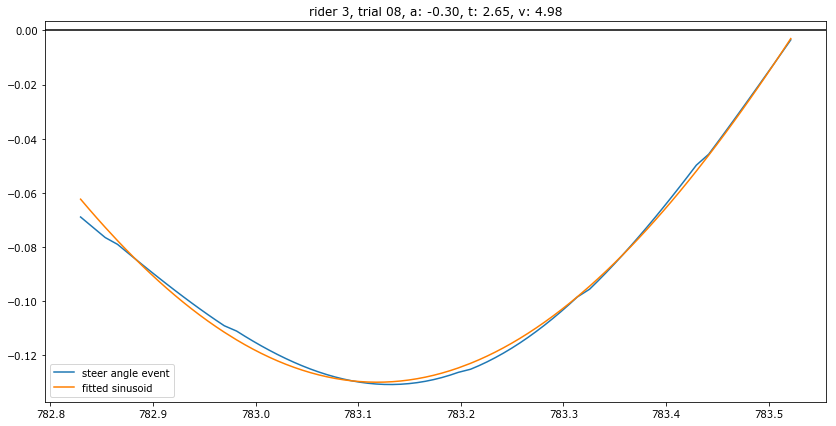

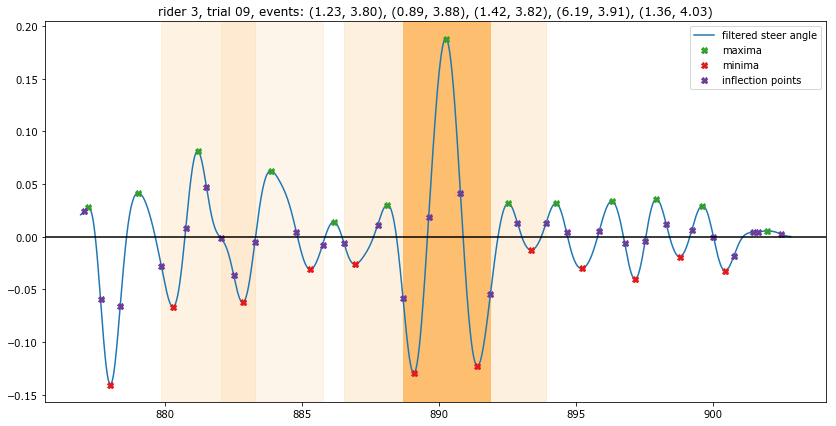

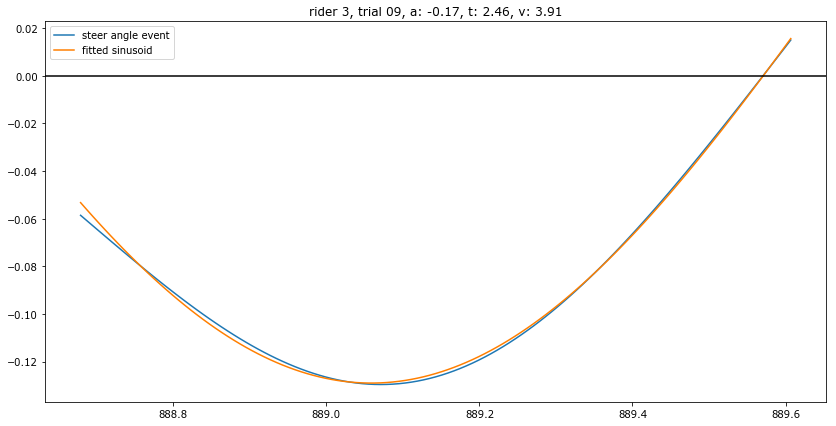

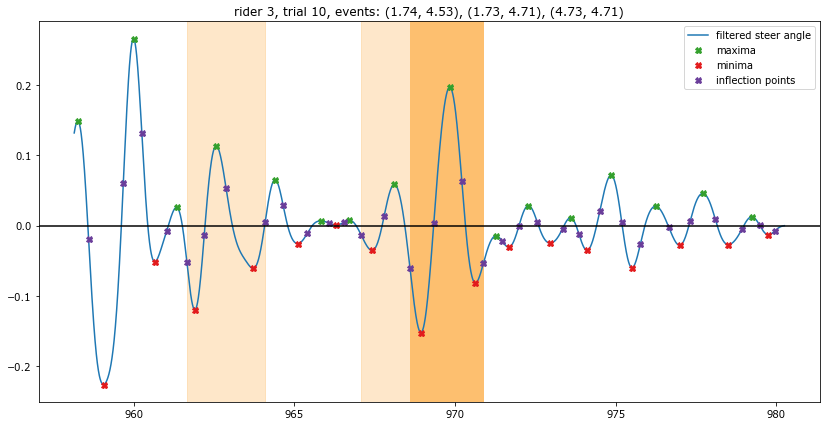

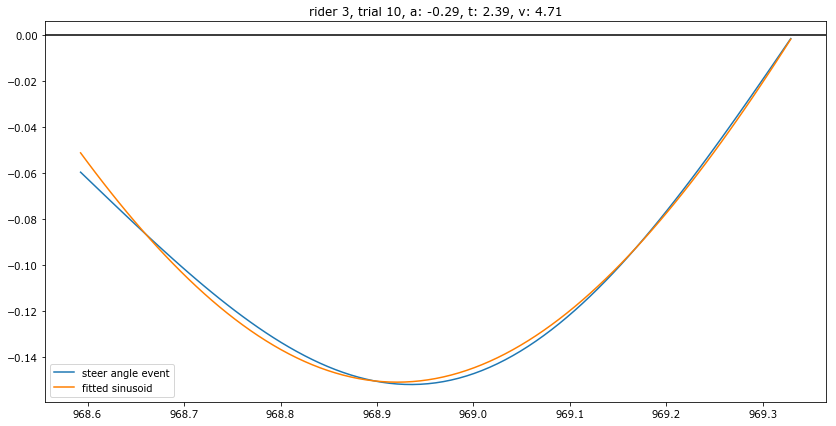

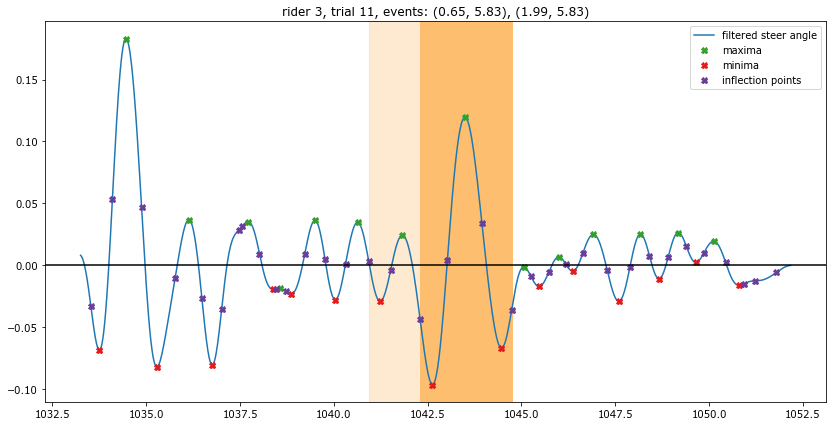

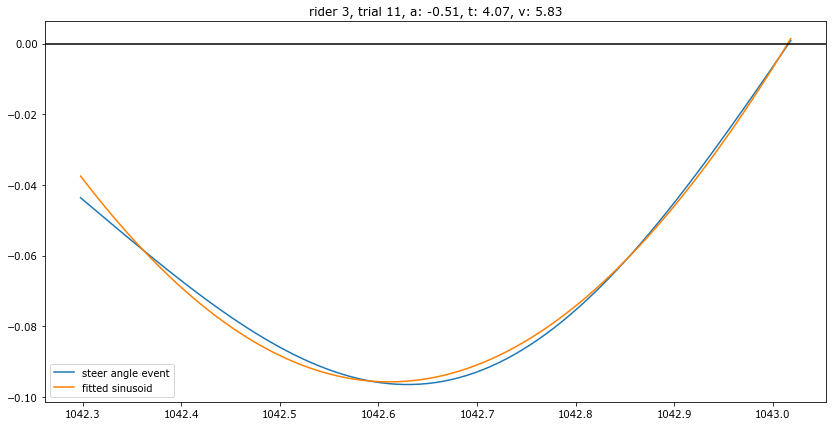

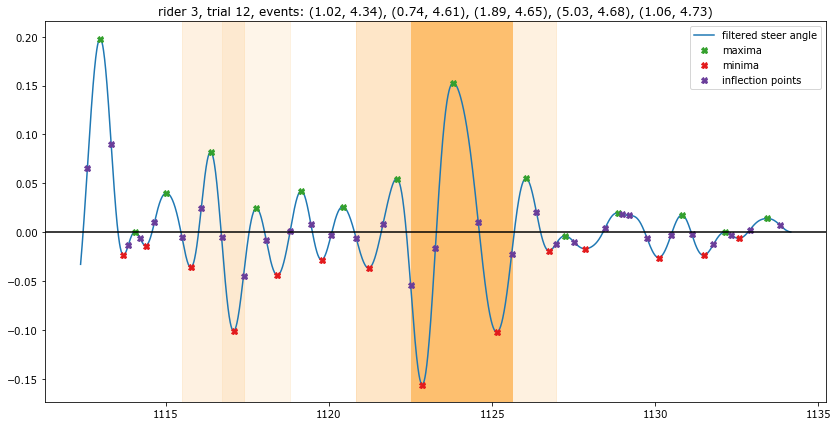

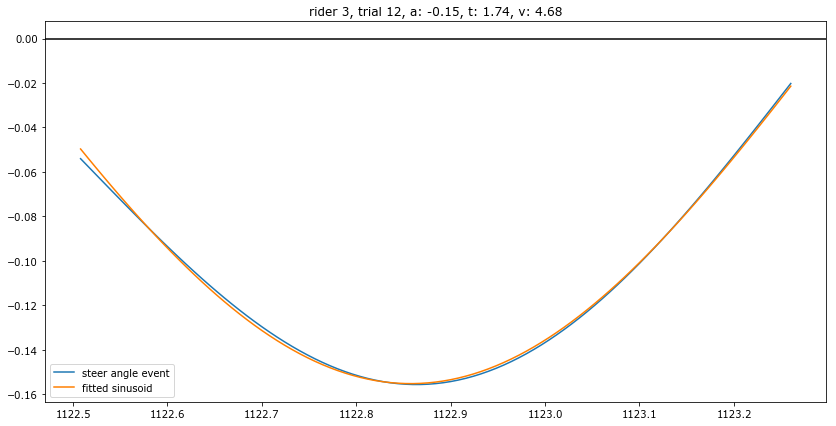

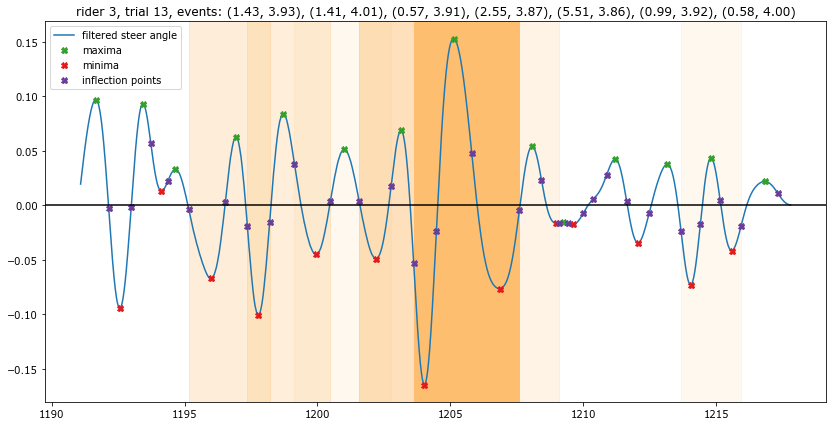

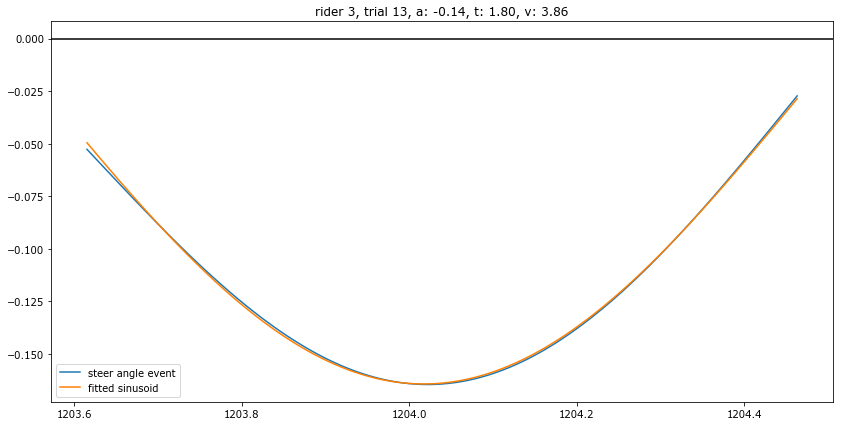

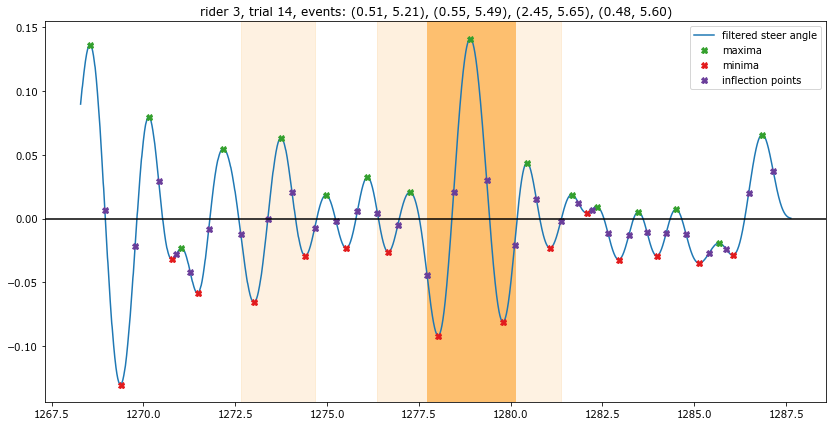

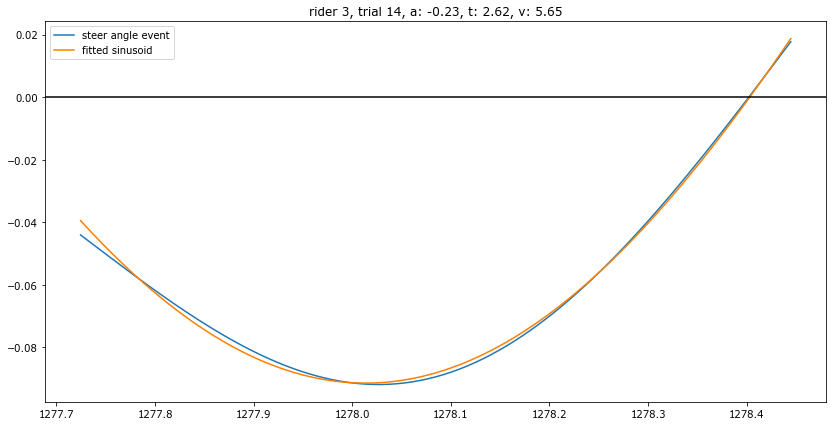

In [4]:
import numpy as np
import scipy
import seaborn as sns


# rider, speed, amplitude, freq
data = np.zeros((4*15, 5))

plt.close()
for rid, tid in itertools.product(range(4), range(15)):
    record = records[rid]
    trial = record.trial[tid]
    
    try:
        ax = trial.plot_steer_event_detection(figsize=DEFAULT_FIGSIZE)
        ax.set_title('rider {}, trial {:02d}, events: {}'.format(rid, tid, ax.get_title()))
    except ValueError:
        continue
    
    est, (t, y, est_y), ev = trial.steer_event_parameters()
    
    fit_desc = 'rider {}, trial {:02d}, a: {:0.02f}, t: {:0.02f}, v: {:0.02f}'.format(
        rid, tid, est[0], 1/est[1], ev.speed)
    data[rid*15 + tid, :] = np.array([rid, tid, ev.speed, -est[0], 1/est[1]])
    
    colors = sns.color_palette('Paired', 10)
    fig2, ax2 = plt.subplots(figsize=DEFAULT_FIGSIZE)
    ax2.plot(t, y, label='steer angle event', color=colors[1])
    ax2.plot(t, est_y, label='fitted sinusoid', color=colors[7])
    ax2.legend()
    ax2.set_title(fit_desc)
    ax2.axhline(0, color='black')
plt.show()

In [5]:
import pandas as pd

# Average speed (v) in this dataframe is over the
# steer avoidance event (infl, min, infl, max, infl, min, infl)
# and not just the sinusoid fit region (infl, min, infl)
df = pd.DataFrame(data=data, columns=['rider', 'trial', 'v', 'a', 't'])
print(df)

    rider  trial         v         a          t
0     0.0    0.0  0.294541  0.299567   2.881839
1     0.0    0.0  0.000000  0.000000   0.000000
2     0.0    2.0  6.022226  0.024990   2.079116
3     0.0    3.0  4.016655  0.534899   3.492856
4     0.0    4.0  5.368322  0.038307   1.523387
5     0.0    5.0  5.994924  0.115004   2.467268
6     0.0    6.0  4.567633  0.377467   4.025128
7     0.0    7.0  5.189857  0.172512   2.834785
8     0.0    8.0  6.206539  0.042693   2.629231
9     0.0    9.0  4.198477  0.068356   3.164535
10    0.0   10.0  5.559790  0.171571   3.232057
11    0.0   11.0  6.314231  0.087470   1.824191
12    0.0   12.0  4.550632  0.222515   2.574741
13    0.0   13.0  5.537313  0.140905   3.347173
14    0.0   14.0  6.351615  1.302284  18.851687
15    1.0    0.0  4.986281  0.041481   2.421580
16    1.0    1.0  6.477340  0.026489   1.647223
17    1.0    2.0  5.304934  0.166526   3.321516
18    1.0    3.0  4.390369  0.091368   3.360120
19    1.0    4.0  6.106657  2.111708  29

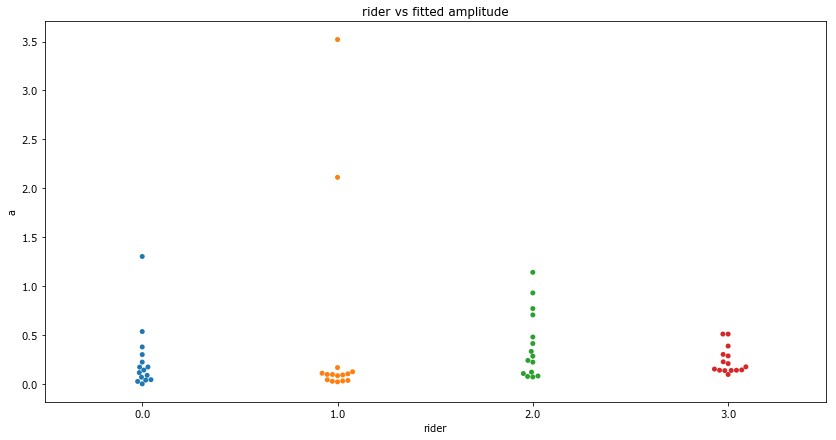

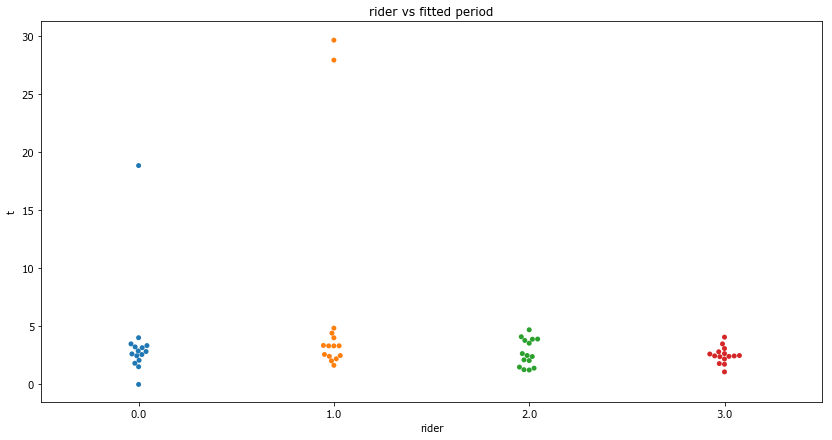

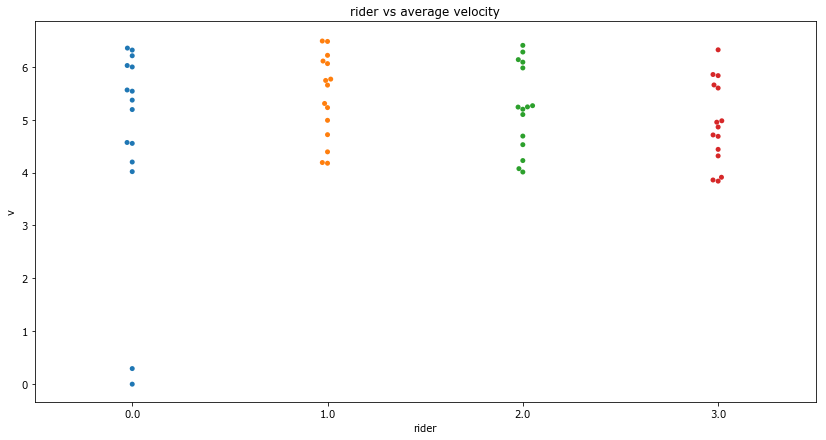

In [6]:
fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='a', data=df, ax=ax)
ax.set_title('rider vs fitted amplitude')

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='t', data=df, ax=ax)
ax.set_title('rider vs fitted period')

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='v', data=df, ax=ax)
ax.set_title('rider vs average velocity')
plt.show()

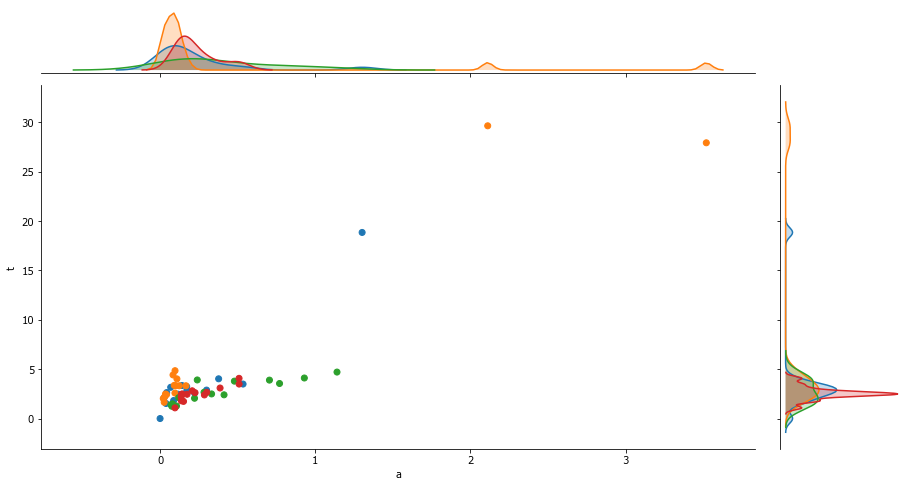

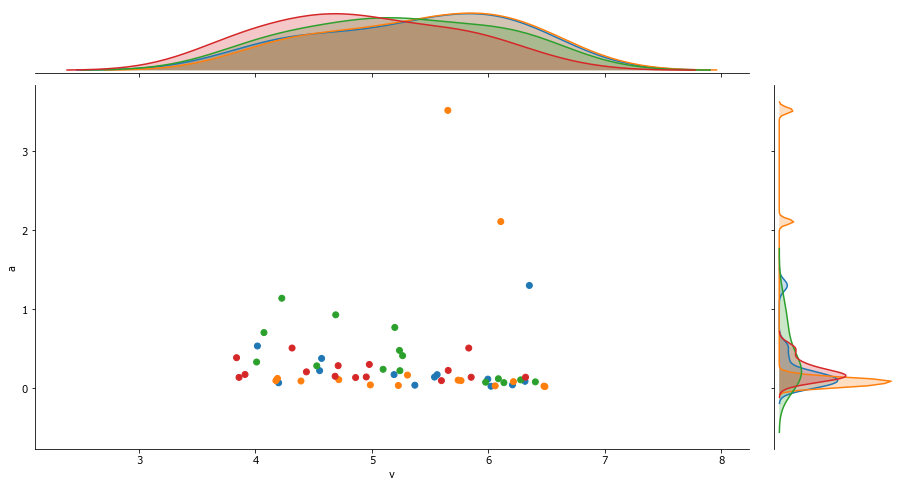

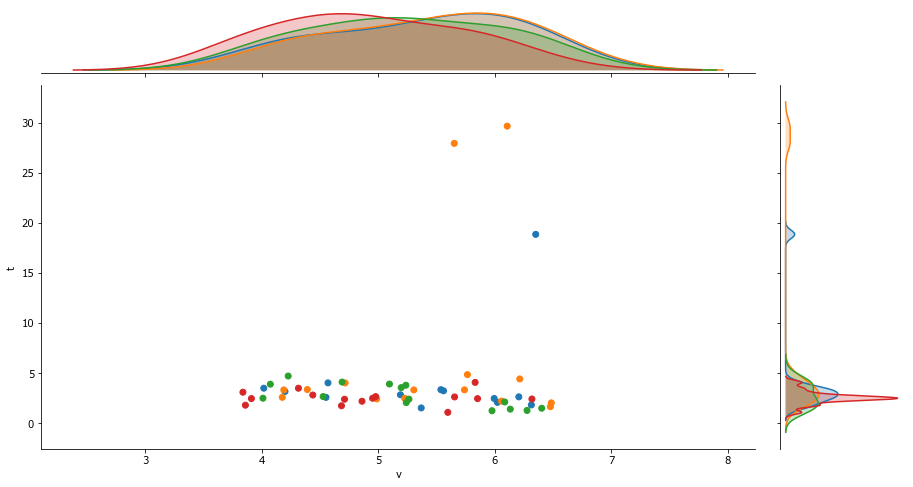

In [7]:
from antlia.plotdf import colormap, plotjoint
colors = sns.color_palette()

plt.close()
g = plotjoint('a', 't', df, ('rider', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g = plotjoint('v', 'a', df[df.v > 1], ('rider', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g = plotjoint('v', 't', df[df.v > 1], ('rider', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
plt.show()

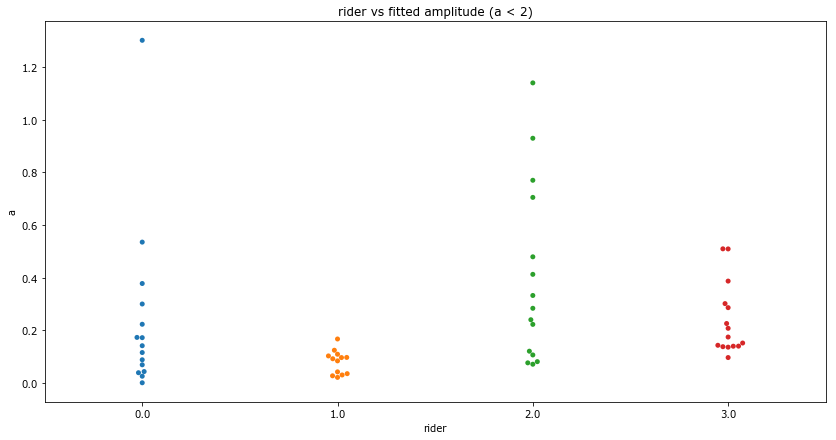

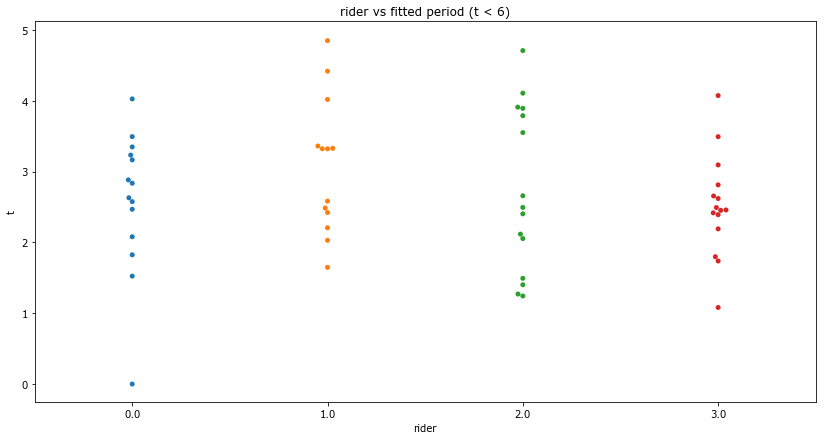

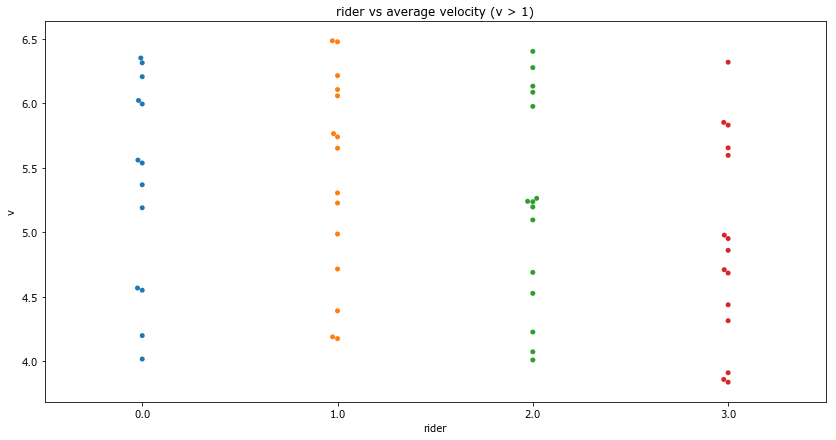

In [8]:
fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='a', data=df[df.a < 2], ax=ax)
ax.set_title('rider vs fitted amplitude (a < 2)')

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='t', data=df[df.t < 6], ax=ax)
ax.set_title('rider vs fitted period (t < 6)')

fig, ax = plt.subplots(figsize=DEFAULT_FIGSIZE)
sns.swarmplot(x='rider', y='v', data=df[df.v > 1], ax=ax)
ax.set_title('rider vs average velocity (v > 1)')
plt.show()

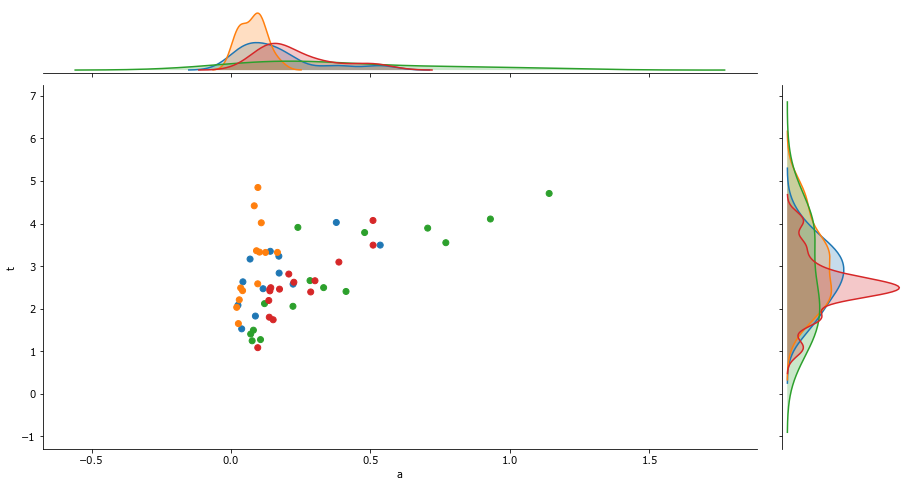

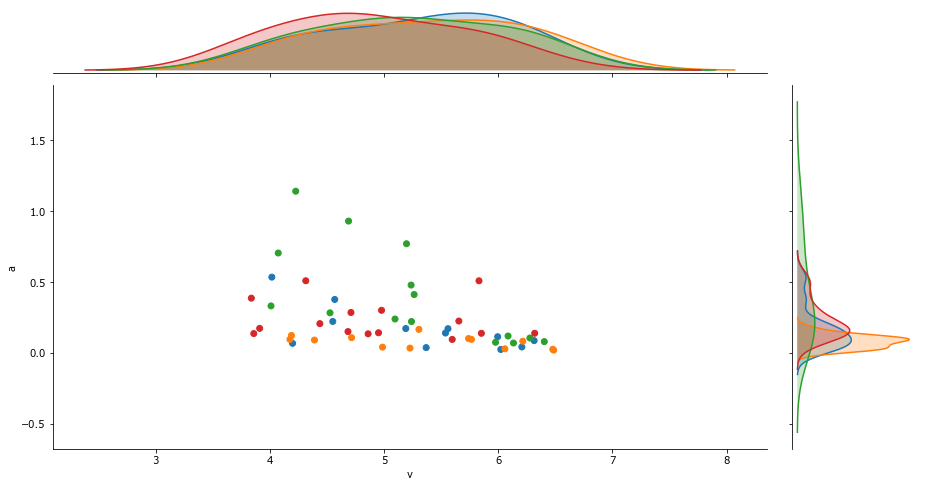

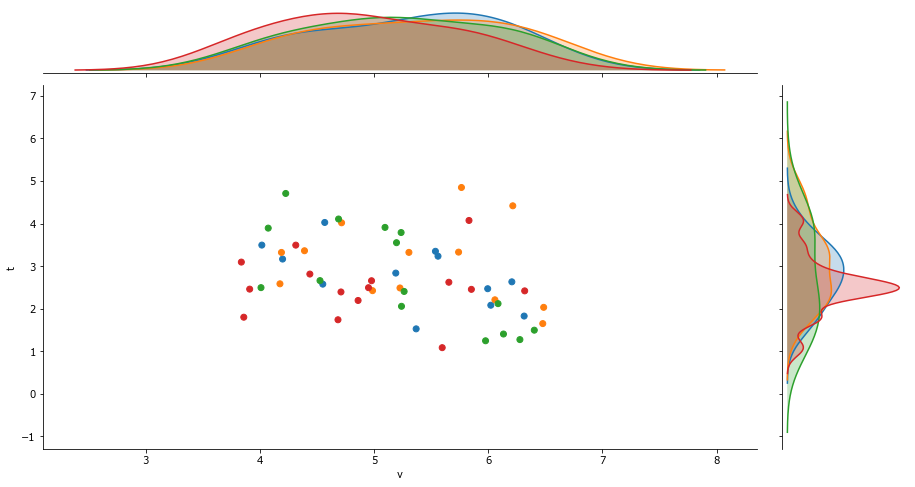

In [9]:
colors = sns.color_palette()

plt.close()
g = plotjoint('a', 't', df[(df.t < 6) & (df.v > 1)], ('rider', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g = plotjoint('v', 'a', df[(df.t < 6) & (df.v > 1)], ('rider', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
g = plotjoint('v', 't', df[(df.t < 6) & (df.v > 1)], ('rider', colors))
g.fig.set_size_inches(DEFAULT_FIGSIZE)
plt.show()